# Your first neural network

In this project, you'll build your first neural network and use it to predict daily bike rental ridership. We've provided some of the code, but left the implementation of the neural network up to you (for the most part). After you've submitted this project, feel free to explore the data and the model more.



In [45]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and prepare the data

A critical step in working with neural networks is preparing the data correctly. Variables on different scales make it difficult for the network to efficiently learn the correct weights. Below, we've written the code to load and prepare the data. You'll learn more about this soon!

In [46]:
data_path = 'bike_sharing/Bike-Sharing-Dataset/hour.csv'

rides = pd.read_csv(data_path)

In [47]:
rides.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>instant</th>
      <th>dteday</th>
      <th>season</th>
      <th>yr</th>
      <th>mnth</th>
      <th>hr</th>
      <th>holiday</th>
      <th>weekday</th>
      <th>workingday</th>
      <th>weathersit</th>
      <th>temp</th>
      <th>atemp</th>
      <th>hum</th>
      <th>windspeed</th>
      <th>casual</th>
      <th>registered</th>
      <th>cnt</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>2011-01-01</td>
      <td>1</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>6</td>
      <td>0</td>
      <td>1</td>
      <td>0.24</td>
      <td>0.2879</td>
      <td>0.81</td>
      <td>0.0</td>
      <td>3</td>
      <td>13</td>
      <td>16</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>2011-01-01</td>
      <td>1</td>
      <td>0</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
      <td>6</td>
      <td>0</td>
      <td>1</td>
      <td>0.22</td>
      <td>0.2727</td>
      <td>0.80</td>
      <td>0.0</td>
      <td>8</td>
      <td>32</td>
      <td>40</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>2011-01-01</td>
      <td>1</td>
      <td>0</td>
      <td>1</td>
      <td>2</td>
      <td>0</td>
      <td>6</td>
      <td>0</td>
      <td>1</td>
      <td>0.22</td>
      <td>0.2727</td>
      <td>0.80</td>
      <td>0.0</td>
      <td>5</td>
      <td>27</td>
      <td>32</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>2011-01-01</td>
      <td>1</td>
      <td>0</td>
      <td>1</td>
      <td>3</td>
      <td>0</td>
      <td>6</td>
      <td>0</td>
      <td>1</td>
      <td>0.24</td>
      <td>0.2879</td>
      <td>0.75</td>
      <td>0.0</td>
      <td>3</td>
      <td>10</td>
      <td>13</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5</td>
      <td>2011-01-01</td>
      <td>1</td>
      <td>0</td>
      <td>1</td>
      <td>4</td>
      <td>0</td>
      <td>6</td>
      <td>0</td>
      <td>1</td>
      <td>0.24</td>
      <td>0.2879</td>
      <td>0.75</td>
      <td>0.0</td>
      <td>0</td>
      <td>1</td>
      <td>1</td>
    </tr>
  </tbody>
</table>
</div>

## Checking out the data

This dataset has the number of riders for each hour of each day from January 1 2011 to December 31 2012. The number of riders is split between casual and registered, summed up in the `cnt` column. You can see the first few rows of the data above.

Below is a plot showing the number of bike riders over the first 10 days or so in the data set. (Some days don't have exactly 24 entries in the data set, so it's not exactly 10 days.) You can see the hourly rentals here. This data is pretty complicated! The weekends have lower over all ridership and there are spikes when people are biking to and from work during the week. Looking at the data above, we also have information about temperature, humidity, and windspeed, all of these likely affecting the number of riders. You'll be trying to capture all this with your model.

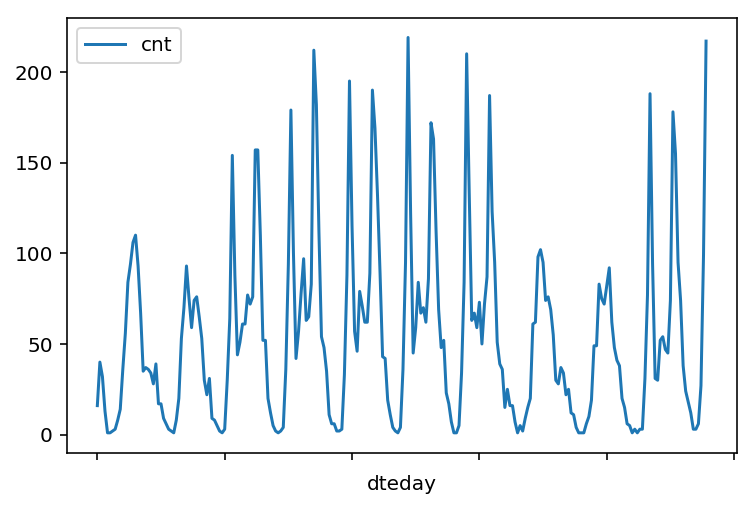

In [49]:
rides[:24*10].plot(x='dteday', y='cnt')

### Dummy variables
Here we have some categorical variables like season, weather, month. To include these in our model, we'll need to make binary dummy variables. This is simple to do with Pandas thanks to `get_dummies()`.

In [50]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>yr</th>
      <th>holiday</th>
      <th>temp</th>
      <th>hum</th>
      <th>windspeed</th>
      <th>casual</th>
      <th>registered</th>
      <th>cnt</th>
      <th>season_1</th>
      <th>season_2</th>
      <th>...</th>
      <th>hr_21</th>
      <th>hr_22</th>
      <th>hr_23</th>
      <th>weekday_0</th>
      <th>weekday_1</th>
      <th>weekday_2</th>
      <th>weekday_3</th>
      <th>weekday_4</th>
      <th>weekday_5</th>
      <th>weekday_6</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>0</td>
      <td>0.24</td>
      <td>0.81</td>
      <td>0.0</td>
      <td>3</td>
      <td>13</td>
      <td>16</td>
      <td>1</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0</td>
      <td>0</td>
      <td>0.22</td>
      <td>0.80</td>
      <td>0.0</td>
      <td>8</td>
      <td>32</td>
      <td>40</td>
      <td>1</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>0</td>
      <td>0.22</td>
      <td>0.80</td>
      <td>0.0</td>
      <td>5</td>
      <td>27</td>
      <td>32</td>
      <td>1</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0</td>
      <td>0</td>
      <td>0.24</td>
      <td>0.75</td>
      <td>0.0</td>
      <td>3</td>
      <td>10</td>
      <td>13</td>
      <td>1</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0</td>
      <td>0</td>
      <td>0.24</td>
      <td>0.75</td>
      <td>0.0</td>
      <td>0</td>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
  </tbody>
</table>
<p>5 rows × 59 columns</p>
</div>

### Scaling target variables
To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [51]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

### Splitting the data into training, testing, and validation sets

We'll save the data for the last approximately 21 days to use as a test set after we've trained the network. We'll use this set to make predictions and compare them with the actual number of riders.

In [52]:
# Save data for approximately the last 21 days 
test_data = data[-21*24:]

# Now remove the test data from the data set 
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

We'll split the data into two sets, one for training and one for validating as the network is being trained. Since this is time series data, we'll train on historical data, then try to predict on future data (the validation set).

In [53]:
# Hold out the last 60 days or so of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

## Time to build the network

Below you'll build your network. We've built out the structure. You'll implement both the forward pass and backwards pass through the network. You'll also set the hyperparameters: the learning rate, the number of hidden units, and the number of training passes.

<img src="assets/neural_network.png" width=300px>

The network has two layers, a hidden layer and an output layer. The hidden layer will use the sigmoid function for activations. The output layer has only one node and is used for the regression, the output of the node is the same as the input of the node. That is, the activation function is $f(x)=x$. A function that takes the input signal and generates an output signal, but takes into account the threshold, is called an activation function. We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer. This process is called *forward propagation*.

We use the weights to propagate signals forward from the input to the output layers in a neural network. We use the weights to also propagate error backwards from the output back into the network to update our weights. This is called *backpropagation*.

> **Hint:** You'll need the derivative of the output activation function ($f(x) = x$) for the backpropagation implementation. If you aren't familiar with calculus, this function is equivalent to the equation $y = x$. What is the slope of that equation? That is the derivative of $f(x)$.

Below, you have these tasks:
1. Implement the sigmoid function to use as the activation function. Set `self.activation_function` in `__init__` to your sigmoid function.
2. Implement the forward pass in the `train` method.
3. Implement the backpropagation algorithm in the `train` method, including calculating the output error.
4. Implement the forward pass in the `run` method.
  

In [54]:
#############
# In the my_answers.py file, fill out the TODO sections as specified
#############

from bike_sharing.neural import NeuralNetwork

In [55]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

## Unit tests

Run these unit tests to check the correctness of your network implementation. This will help you be sure your network was implemented correctly befor you starting trying to train it. These tests must all be successful to pass the project.

In [56]:
import unittest

inputs = np.array([[0.5, -0.2, 0.1]])
targets = np.array([[0.4]])
test_w_i_h = np.array([[0.1, -0.2],
                       [0.4, 0.5],
                       [-0.3, 0.2]])
test_w_h_o = np.array([[0.3],
                       [-0.1]])

class TestMethods(unittest.TestCase):
    
    ##########
    # Unit tests for data loading
    ##########
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered
        self.assertTrue(data_path.lower() == 'bike_sharing/bike-sharing-dataset/hour.csv')
        
    def test_data_loaded(self):
        # Test that data frame loaded
        self.assertTrue(isinstance(rides, pd.DataFrame))
    
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()
        
        network.train(inputs, targets)
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    np.array([[ 0.37275328], 
                                              [-0.03172939]])))
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    np.array([[ 0.10562014, -0.20185996], 
                                              [0.39775194, 0.50074398], 
                                              [-0.29887597, 0.19962801]])))

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()

        self.assertTrue(np.allclose(network.run(inputs), 0.09998924))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)

.

.

.

.

.


----------------------------------------------------------------------
Ran 5 tests in 0.007s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

## Training the network

Here you'll set the hyperparameters for the network. The strategy here is to find hyperparameters such that the error on the training set is low, but you're not overfitting to the data. If you train the network too long or have too many hidden nodes, it can become overly specific to the training set and will fail to generalize to the validation set. That is, the loss on the validation set will start increasing as the training set loss drops.

You'll also be using a method know as Stochastic Gradient Descent (SGD) to train the network. The idea is that for each training pass, you grab a random sample of the data instead of using the whole data set. You use many more training passes than with normal gradient descent, but each pass is much faster. This ends up training the network more efficiently. You'll learn more about SGD later.

### Choose the number of iterations
This is the number of batches of samples from the training data we'll use to train the network. The more iterations you use, the better the model will fit the data. However, this process can have sharply diminishing returns and can waste computational resources if you use too many iterations.  You want to find a number here where the network has a low training loss, and the validation loss is at a minimum. The ideal number of iterations would be a level that stops shortly after the validation loss is no longer decreasing.

### Choose the learning rate
This scales the size of weight updates. If this is too big, the weights tend to explode and the network fails to fit the data. Normally a good choice to start at is 0.1; however, if you effectively divide the learning rate by n_records, try starting out with a learning rate of 1. In either case, if the network has problems fitting the data, try reducing the learning rate. Note that the lower the learning rate, the smaller the steps are in the weight updates and the longer it takes for the neural network to converge.

### Choose the number of hidden nodes
In a model where all the weights are optimized, the more hidden nodes you have, the more accurate the predictions of the model will be.  (A fully optimized model could have weights of zero, after all.) However, the more hidden nodes you have, the harder it will be to optimize the weights of the model, and the more likely it will be that suboptimal weights will lead to overfitting. With overfitting, the model will memorize the training data instead of learning the true pattern, and won't generalize well to unseen data.  

Try a few different numbers and see how it affects the performance. You can look at the losses dictionary for a metric of the network performance. If the number of hidden units is too low, then the model won't have enough space to learn and if it is too high there are too many options for the direction that the learning can take. The trick here is to find the right balance in number of hidden units you choose.  You'll generally find that the best number of hidden nodes to use ends up being between the number of input and output nodes.

In [57]:
import sys

####################
### Set the hyperparameters in you myanswers.py file ###
####################

from bike_sharing.neural import iterations, learning_rate, hidden_nodes, output_nodes


N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    X, y = train_features.ix[batch].values, train_targets.ix[batch]['cnt']
                             
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 0.0% ... Training loss: 2.312 ... Validation loss: 2.023

Progress: 0.1% ... Training loss: 6.098 ... Validation loss: 7.807

Progress: 0.1% ... Training loss: 14.08 ... Validation loss: 12.00

Progress: 0.2% ... Training loss: 9.304 ... Validation loss: 10.95

Progress: 0.3% ... Training loss: 0.928 ... Validation loss: 1.396

Progress: 0.3% ... Training loss: 0.924 ... Validation loss: 1.374

Progress: 0.4% ... Training loss: 0.916 ... Validation loss: 1.382

Progress: 0.5% ... Training loss: 0.906 ... Validation loss: 1.378

Progress: 0.5% ... Training loss: 0.897 ... Validation loss: 1.381

Progress: 0.6% ... Training loss: 0.887 ... Validation loss: 1.367

Progress: 0.7% ... Training loss: 0.877 ... Validation loss: 1.314

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Progress: 0.7% ... Training loss: 0.857 ... Validation loss: 1.338

Progress: 0.8% ... Training loss: 0.848 ... Validation loss: 1.383

Progress: 0.9% ... Training loss: 0.834 ... Validation loss: 1.368

Progress: 0.9% ... Training loss: 0.819 ... Validation loss: 1.366

Progress: 1.0% ... Training loss: 0.807 ... Validation loss: 1.365

Progress: 1.1% ... Training loss: 0.784 ... Validation loss: 1.317

Progress: 1.1% ... Training loss: 0.764 ... Validation loss: 1.262

Progress: 1.2% ... Training loss: 0.748 ... Validation loss: 1.258

Progress: 1.3% ... Training loss: 0.738 ... Validation loss: 1.280

Progress: 1.3% ... Training loss: 0.723 ... Validation loss: 1.198

Progress: 1.4% ... Training loss: 0.703 ... Validation loss: 1.230

Progress: 1.5% ... Training loss: 0.689 ... Validation loss: 1.167

Progress: 1.5% ... Training loss: 0.679 ... Validation loss: 1.172

Progress: 1.6% ... Training loss: 0.668 ... Validation loss: 1.150

Progress: 1.7% ... Training loss: 0.660 ... Validation loss: 1.154

Progress: 1.7% ... Training loss: 0.654 ... Validation loss: 1.137

Progress: 1.8% ... Training loss: 0.648 ... Validation loss: 1.128

Progress: 1.9% ... Training loss: 0.647 ... Validation loss: 1.154

Progress: 1.9% ... Training loss: 0.639 ... Validation loss: 1.139

Progress: 2.0% ... Training loss: 0.631 ... Validation loss: 1.093

Progress: 2.1% ... Training loss: 0.624 ... Validation loss: 1.085

Progress: 2.1% ... Training loss: 0.622 ... Validation loss: 1.036

Progress: 2.2% ... Training loss: 0.617 ... Validation loss: 1.073

Progress: 2.3% ... Training loss: 0.611 ... Validation loss: 1.024

Progress: 2.3% ... Training loss: 0.606 ... Validation loss: 1.035

Progress: 2.4% ... Training loss: 0.600 ... Validation loss: 1.017

Progress: 2.5% ... Training loss: 0.595 ... Validation loss: 1.005

Progress: 2.5% ... Training loss: 0.592 ... Validation loss: 1.009

Progress: 2.6% ... Training loss: 0.592 ... Validation loss: 1.036

Progress: 2.7% ... Training loss: 0.584 ... Validation loss: 0.971

Progress: 2.7% ... Training loss: 0.579 ... Validation loss: 0.998

Progress: 2.8% ... Training loss: 0.577 ... Validation loss: 0.997

Progress: 2.9% ... Training loss: 0.574 ... Validation loss: 0.955

Progress: 2.9% ... Training loss: 0.588 ... Validation loss: 0.907

Progress: 3.0% ... Training loss: 0.569 ... Validation loss: 0.913

Progress: 3.1% ... Training loss: 0.557 ... Validation loss: 0.941

Progress: 3.1% ... Training loss: 0.554 ... Validation loss: 0.934

Progress: 3.2% ... Training loss: 0.550 ... Validation loss: 0.919

Progress: 3.3% ... Training loss: 0.546 ... Validation loss: 0.904

Progress: 3.3% ... Training loss: 0.545 ... Validation loss: 0.889

Progress: 3.4% ... Training loss: 0.541 ... Validation loss: 0.912

Progress: 3.5% ... Training loss: 0.536 ... Validation loss: 0.880

Progress: 3.5% ... Training loss: 0.534 ... Validation loss: 0.900

Progress: 3.6% ... Training loss: 0.533 ... Validation loss: 0.905

Progress: 3.7% ... Training loss: 0.525 ... Validation loss: 0.878

Progress: 3.7% ... Training loss: 0.535 ... Validation loss: 0.918

Progress: 3.8% ... Training loss: 0.517 ... Validation loss: 0.849

Progress: 3.9% ... Training loss: 0.512 ... Validation loss: 0.833

Progress: 3.9% ... Training loss: 0.508 ... Validation loss: 0.847

Progress: 4.0% ... Training loss: 0.506 ... Validation loss: 0.820

Progress: 4.1% ... Training loss: 0.501 ... Validation loss: 0.841

Progress: 4.1% ... Training loss: 0.495 ... Validation loss: 0.809

Progress: 4.2% ... Training loss: 0.492 ... Validation loss: 0.795

Progress: 4.3% ... Training loss: 0.484 ... Validation loss: 0.793

Progress: 4.3% ... Training loss: 0.482 ... Validation loss: 0.802

Progress: 4.4% ... Training loss: 0.477 ... Validation loss: 0.785

Progress: 4.5% ... Training loss: 0.477 ... Validation loss: 0.792

Progress: 4.5% ... Training loss: 0.470 ... Validation loss: 0.772

Progress: 4.6% ... Training loss: 0.476 ... Validation loss: 0.792

Progress: 4.7% ... Training loss: 0.466 ... Validation loss: 0.775

Progress: 4.7% ... Training loss: 0.463 ... Validation loss: 0.759

Progress: 4.8% ... Training loss: 0.454 ... Validation loss: 0.749

Progress: 4.9% ... Training loss: 0.446 ... Validation loss: 0.739

Progress: 4.9% ... Training loss: 0.445 ... Validation loss: 0.736

Progress: 5.0% ... Training loss: 0.441 ... Validation loss: 0.729

Progress: 5.1% ... Training loss: 0.434 ... Validation loss: 0.716

Progress: 5.1% ... Training loss: 0.428 ... Validation loss: 0.707

Progress: 5.2% ... Training loss: 0.427 ... Validation loss: 0.705

Progress: 5.3% ... Training loss: 0.426 ... Validation loss: 0.705

Progress: 5.3% ... Training loss: 0.429 ... Validation loss: 0.708

Progress: 5.4% ... Training loss: 0.417 ... Validation loss: 0.694

Progress: 5.5% ... Training loss: 0.411 ... Validation loss: 0.686

Progress: 5.5% ... Training loss: 0.407 ... Validation loss: 0.678

Progress: 5.6% ... Training loss: 0.403 ... Validation loss: 0.671

Progress: 5.7% ... Training loss: 0.401 ... Validation loss: 0.665

Progress: 5.7% ... Training loss: 0.396 ... Validation loss: 0.658

Progress: 5.8% ... Training loss: 0.393 ... Validation loss: 0.654

Progress: 5.9% ... Training loss: 0.390 ... Validation loss: 0.643

Progress: 5.9% ... Training loss: 0.389 ... Validation loss: 0.650

Progress: 6.0% ... Training loss: 0.388 ... Validation loss: 0.643

Progress: 6.1% ... Training loss: 0.383 ... Validation loss: 0.631

Progress: 6.1% ... Training loss: 0.373 ... Validation loss: 0.624

Progress: 6.2% ... Training loss: 0.374 ... Validation loss: 0.621

Progress: 6.3% ... Training loss: 0.389 ... Validation loss: 0.626

Progress: 6.3% ... Training loss: 0.365 ... Validation loss: 0.604

Progress: 6.4% ... Training loss: 0.370 ... Validation loss: 0.603

Progress: 6.5% ... Training loss: 0.364 ... Validation loss: 0.597

Progress: 6.5% ... Training loss: 0.361 ... Validation loss: 0.595

Progress: 6.6% ... Training loss: 0.354 ... Validation loss: 0.592

Progress: 6.7% ... Training loss: 0.353 ... Validation loss: 0.587

Progress: 6.7% ... Training loss: 0.369 ... Validation loss: 0.593

Progress: 6.8% ... Training loss: 0.347 ... Validation loss: 0.576

Progress: 6.9% ... Training loss: 0.347 ... Validation loss: 0.573

Progress: 6.9% ... Training loss: 0.367 ... Validation loss: 0.583

Progress: 7.0% ... Training loss: 0.351 ... Validation loss: 0.570

Progress: 7.1% ... Training loss: 0.339 ... Validation loss: 0.558

Progress: 7.1% ... Training loss: 0.335 ... Validation loss: 0.554

Progress: 7.2% ... Training loss: 0.332 ... Validation loss: 0.551

Progress: 7.3% ... Training loss: 0.333 ... Validation loss: 0.568

Progress: 7.3% ... Training loss: 0.332 ... Validation loss: 0.563

Progress: 7.4% ... Training loss: 0.329 ... Validation loss: 0.562

Progress: 7.5% ... Training loss: 0.338 ... Validation loss: 0.559

Progress: 7.5% ... Training loss: 0.329 ... Validation loss: 0.526

Progress: 7.6% ... Training loss: 0.323 ... Validation loss: 0.530

Progress: 7.7% ... Training loss: 0.318 ... Validation loss: 0.534

Progress: 7.7% ... Training loss: 0.317 ... Validation loss: 0.524

Progress: 7.8% ... Training loss: 0.316 ... Validation loss: 0.514

Progress: 7.9% ... Training loss: 0.313 ... Validation loss: 0.525

Progress: 7.9% ... Training loss: 0.313 ... Validation loss: 0.526

Progress: 8.0% ... Training loss: 0.313 ... Validation loss: 0.511

Progress: 8.1% ... Training loss: 0.312 ... Validation loss: 0.522

Progress: 8.1% ... Training loss: 0.313 ... Validation loss: 0.519

Progress: 8.2% ... Training loss: 0.310 ... Validation loss: 0.523

Progress: 8.3% ... Training loss: 0.307 ... Validation loss: 0.517

Progress: 8.3% ... Training loss: 0.339 ... Validation loss: 0.530

Progress: 8.4% ... Training loss: 0.306 ... Validation loss: 0.504

Progress: 8.5% ... Training loss: 0.340 ... Validation loss: 0.533

Progress: 8.5% ... Training loss: 0.306 ... Validation loss: 0.503

Progress: 8.6% ... Training loss: 0.309 ... Validation loss: 0.511

Progress: 8.7% ... Training loss: 0.301 ... Validation loss: 0.499

Progress: 8.7% ... Training loss: 0.307 ... Validation loss: 0.498

Progress: 8.8% ... Training loss: 0.302 ... Validation loss: 0.499

Progress: 8.9% ... Training loss: 0.316 ... Validation loss: 0.506

Progress: 8.9% ... Training loss: 0.300 ... Validation loss: 0.482

Progress: 9.0% ... Training loss: 0.299 ... Validation loss: 0.475

Progress: 9.1% ... Training loss: 0.293 ... Validation loss: 0.479

Progress: 9.1% ... Training loss: 0.308 ... Validation loss: 0.474

Progress: 9.2% ... Training loss: 0.298 ... Validation loss: 0.478

Progress: 9.3% ... Training loss: 0.296 ... Validation loss: 0.493

Progress: 9.3% ... Training loss: 0.291 ... Validation loss: 0.479

Progress: 9.4% ... Training loss: 0.292 ... Validation loss: 0.485

Progress: 9.5% ... Training loss: 0.292 ... Validation loss: 0.487

Progress: 9.5% ... Training loss: 0.291 ... Validation loss: 0.484

Progress: 9.6% ... Training loss: 0.292 ... Validation loss: 0.479

Progress: 9.7% ... Training loss: 0.305 ... Validation loss: 0.517

Progress: 9.7% ... Training loss: 0.318 ... Validation loss: 0.490

Progress: 9.8% ... Training loss: 0.288 ... Validation loss: 0.476

Progress: 9.9% ... Training loss: 0.289 ... Validation loss: 0.481

Progress: 9.9% ... Training loss: 0.285 ... Validation loss: 0.472

Progress: 10.0% ... Training loss: 0.285 ... Validation loss: 0.474

Progress: 10.1% ... Training loss: 0.292 ... Validation loss: 0.481

Progress: 10.1% ... Training loss: 0.290 ... Validation loss: 0.478

Progress: 10.2% ... Training loss: 0.285 ... Validation loss: 0.468

Progress: 10.3% ... Training loss: 0.289 ... Validation loss: 0.479

Progress: 10.3% ... Training loss: 0.306 ... Validation loss: 0.462

Progress: 10.4% ... Training loss: 0.296 ... Validation loss: 0.497

Progress: 10.5% ... Training loss: 0.287 ... Validation loss: 0.465

Progress: 10.5% ... Training loss: 0.286 ... Validation loss: 0.467

Progress: 10.6% ... Training loss: 0.291 ... Validation loss: 0.490

Progress: 10.7% ... Training loss: 0.285 ... Validation loss: 0.470

Progress: 10.7% ... Training loss: 0.282 ... Validation loss: 0.470

Progress: 10.8% ... Training loss: 0.281 ... Validation loss: 0.469

Progress: 10.9% ... Training loss: 0.306 ... Validation loss: 0.505

Progress: 10.9% ... Training loss: 0.287 ... Validation loss: 0.481

Progress: 11.0% ... Training loss: 0.283 ... Validation loss: 0.470

Progress: 11.1% ... Training loss: 0.285 ... Validation loss: 0.478

Progress: 11.1% ... Training loss: 0.285 ... Validation loss: 0.469

Progress: 11.2% ... Training loss: 0.301 ... Validation loss: 0.494

Progress: 11.3% ... Training loss: 0.297 ... Validation loss: 0.477

Progress: 11.3% ... Training loss: 0.280 ... Validation loss: 0.470

Progress: 11.4% ... Training loss: 0.292 ... Validation loss: 0.463

Progress: 11.5% ... Training loss: 0.285 ... Validation loss: 0.475

Progress: 11.5% ... Training loss: 0.281 ... Validation loss: 0.448

Progress: 11.6% ... Training loss: 0.279 ... Validation loss: 0.463

Progress: 11.7% ... Training loss: 0.276 ... Validation loss: 0.460

Progress: 11.7% ... Training loss: 0.276 ... Validation loss: 0.450

Progress: 11.8% ... Training loss: 0.276 ... Validation loss: 0.461

Progress: 11.9% ... Training loss: 0.278 ... Validation loss: 0.470

Progress: 11.9% ... Training loss: 0.279 ... Validation loss: 0.477

Progress: 12.0% ... Training loss: 0.282 ... Validation loss: 0.450

Progress: 12.1% ... Training loss: 0.289 ... Validation loss: 0.460

Progress: 12.1% ... Training loss: 0.292 ... Validation loss: 0.452

Progress: 12.2% ... Training loss: 0.276 ... Validation loss: 0.451

Progress: 12.3% ... Training loss: 0.277 ... Validation loss: 0.448

Progress: 12.3% ... Training loss: 0.274 ... Validation loss: 0.442

Progress: 12.4% ... Training loss: 0.270 ... Validation loss: 0.446

Progress: 12.5% ... Training loss: 0.271 ... Validation loss: 0.451

Progress: 12.5% ... Training loss: 0.277 ... Validation loss: 0.457

Progress: 12.6% ... Training loss: 0.272 ... Validation loss: 0.450

Progress: 12.7% ... Training loss: 0.269 ... Validation loss: 0.451

Progress: 12.7% ... Training loss: 0.270 ... Validation loss: 0.452

Progress: 12.8% ... Training loss: 0.279 ... Validation loss: 0.463

Progress: 12.9% ... Training loss: 0.271 ... Validation loss: 0.447

Progress: 12.9% ... Training loss: 0.269 ... Validation loss: 0.447

Progress: 13.0% ... Training loss: 0.276 ... Validation loss: 0.446

Progress: 13.1% ... Training loss: 0.275 ... Validation loss: 0.457

Progress: 13.1% ... Training loss: 0.280 ... Validation loss: 0.447

Progress: 13.2% ... Training loss: 0.282 ... Validation loss: 0.445

Progress: 13.3% ... Training loss: 0.270 ... Validation loss: 0.436

Progress: 13.3% ... Training loss: 0.279 ... Validation loss: 0.460

Progress: 13.4% ... Training loss: 0.279 ... Validation loss: 0.449

Progress: 13.5% ... Training loss: 0.281 ... Validation loss: 0.462

Progress: 13.5% ... Training loss: 0.282 ... Validation loss: 0.464

Progress: 13.6% ... Training loss: 0.279 ... Validation loss: 0.461

Progress: 13.7% ... Training loss: 0.269 ... Validation loss: 0.446

Progress: 13.7% ... Training loss: 0.276 ... Validation loss: 0.456

Progress: 13.8% ... Training loss: 0.291 ... Validation loss: 0.450

Progress: 13.9% ... Training loss: 0.277 ... Validation loss: 0.448

Progress: 13.9% ... Training loss: 0.268 ... Validation loss: 0.442

Progress: 14.0% ... Training loss: 0.267 ... Validation loss: 0.450

Progress: 14.1% ... Training loss: 0.268 ... Validation loss: 0.450

Progress: 14.1% ... Training loss: 0.272 ... Validation loss: 0.444

Progress: 14.2% ... Training loss: 0.290 ... Validation loss: 0.468

Progress: 14.3% ... Training loss: 0.264 ... Validation loss: 0.445

Progress: 14.3% ... Training loss: 0.267 ... Validation loss: 0.445

Progress: 14.4% ... Training loss: 0.274 ... Validation loss: 0.454

Progress: 14.5% ... Training loss: 0.289 ... Validation loss: 0.459

Progress: 14.5% ... Training loss: 0.300 ... Validation loss: 0.472

Progress: 14.6% ... Training loss: 0.287 ... Validation loss: 0.483

Progress: 14.7% ... Training loss: 0.290 ... Validation loss: 0.466

Progress: 14.7% ... Training loss: 0.270 ... Validation loss: 0.435

Progress: 14.8% ... Training loss: 0.298 ... Validation loss: 0.461

Progress: 14.9% ... Training loss: 0.274 ... Validation loss: 0.442

Progress: 14.9% ... Training loss: 0.288 ... Validation loss: 0.465

Progress: 15.0% ... Training loss: 0.295 ... Validation loss: 0.468

Progress: 15.1% ... Training loss: 0.265 ... Validation loss: 0.439

Progress: 15.1% ... Training loss: 0.269 ... Validation loss: 0.449

Progress: 15.2% ... Training loss: 0.264 ... Validation loss: 0.441

Progress: 15.3% ... Training loss: 0.272 ... Validation loss: 0.434

Progress: 15.3% ... Training loss: 0.266 ... Validation loss: 0.439

Progress: 15.4% ... Training loss: 0.264 ... Validation loss: 0.441

Progress: 15.5% ... Training loss: 0.267 ... Validation loss: 0.433

Progress: 15.5% ... Training loss: 0.263 ... Validation loss: 0.435

Progress: 15.6% ... Training loss: 0.262 ... Validation loss: 0.432

Progress: 15.7% ... Training loss: 0.267 ... Validation loss: 0.426

Progress: 15.7% ... Training loss: 0.271 ... Validation loss: 0.437

Progress: 15.8% ... Training loss: 0.312 ... Validation loss: 0.476

Progress: 15.9% ... Training loss: 0.321 ... Validation loss: 0.478

Progress: 15.9% ... Training loss: 0.268 ... Validation loss: 0.449

Progress: 16.0% ... Training loss: 0.263 ... Validation loss: 0.438

Progress: 16.1% ... Training loss: 0.263 ... Validation loss: 0.435

Progress: 16.1% ... Training loss: 0.260 ... Validation loss: 0.437

Progress: 16.2% ... Training loss: 0.277 ... Validation loss: 0.444

Progress: 16.3% ... Training loss: 0.264 ... Validation loss: 0.434

Progress: 16.3% ... Training loss: 0.259 ... Validation loss: 0.429

Progress: 16.4% ... Training loss: 0.272 ... Validation loss: 0.451

Progress: 16.5% ... Training loss: 0.261 ... Validation loss: 0.431

Progress: 16.5% ... Training loss: 0.261 ... Validation loss: 0.439

Progress: 16.6% ... Training loss: 0.264 ... Validation loss: 0.441

Progress: 16.7% ... Training loss: 0.268 ... Validation loss: 0.452

Progress: 16.7% ... Training loss: 0.274 ... Validation loss: 0.445

Progress: 16.8% ... Training loss: 0.268 ... Validation loss: 0.435

Progress: 16.9% ... Training loss: 0.299 ... Validation loss: 0.476

Progress: 16.9% ... Training loss: 0.260 ... Validation loss: 0.437

Progress: 17.0% ... Training loss: 0.277 ... Validation loss: 0.449

Progress: 17.1% ... Training loss: 0.268 ... Validation loss: 0.438

Progress: 17.1% ... Training loss: 0.265 ... Validation loss: 0.446

Progress: 17.2% ... Training loss: 0.259 ... Validation loss: 0.439

Progress: 17.3% ... Training loss: 0.275 ... Validation loss: 0.438

Progress: 17.3% ... Training loss: 0.273 ... Validation loss: 0.443

Progress: 17.4% ... Training loss: 0.314 ... Validation loss: 0.481

Progress: 17.5% ... Training loss: 0.261 ... Validation loss: 0.435

Progress: 17.5% ... Training loss: 0.263 ... Validation loss: 0.433

Progress: 17.6% ... Training loss: 0.257 ... Validation loss: 0.431

Progress: 17.7% ... Training loss: 0.260 ... Validation loss: 0.440

Progress: 17.7% ... Training loss: 0.257 ... Validation loss: 0.430

Progress: 17.8% ... Training loss: 0.260 ... Validation loss: 0.443

Progress: 17.9% ... Training loss: 0.259 ... Validation loss: 0.424

Progress: 17.9% ... Training loss: 0.257 ... Validation loss: 0.424

Progress: 18.0% ... Training loss: 0.279 ... Validation loss: 0.438

Progress: 18.1% ... Training loss: 0.316 ... Validation loss: 0.477

Progress: 18.1% ... Training loss: 0.279 ... Validation loss: 0.446

Progress: 18.2% ... Training loss: 0.276 ... Validation loss: 0.421

Progress: 18.3% ... Training loss: 0.280 ... Validation loss: 0.466

Progress: 18.3% ... Training loss: 0.266 ... Validation loss: 0.448

Progress: 18.4% ... Training loss: 0.256 ... Validation loss: 0.433

Progress: 18.5% ... Training loss: 0.259 ... Validation loss: 0.438

Progress: 18.5% ... Training loss: 0.285 ... Validation loss: 0.434

Progress: 18.6% ... Training loss: 0.277 ... Validation loss: 0.458

Progress: 18.7% ... Training loss: 0.266 ... Validation loss: 0.435

Progress: 18.7% ... Training loss: 0.279 ... Validation loss: 0.437

Progress: 18.8% ... Training loss: 0.275 ... Validation loss: 0.439

Progress: 18.9% ... Training loss: 0.258 ... Validation loss: 0.425

Progress: 18.9% ... Training loss: 0.255 ... Validation loss: 0.432

Progress: 19.0% ... Training loss: 0.263 ... Validation loss: 0.450

Progress: 19.1% ... Training loss: 0.309 ... Validation loss: 0.432

Progress: 19.1% ... Training loss: 0.286 ... Validation loss: 0.469

Progress: 19.2% ... Training loss: 0.265 ... Validation loss: 0.427

Progress: 19.3% ... Training loss: 0.261 ... Validation loss: 0.441

Progress: 19.3% ... Training loss: 0.261 ... Validation loss: 0.436

Progress: 19.4% ... Training loss: 0.266 ... Validation loss: 0.425

Progress: 19.5% ... Training loss: 0.280 ... Validation loss: 0.446

Progress: 19.5% ... Training loss: 0.289 ... Validation loss: 0.435

Progress: 19.6% ... Training loss: 0.256 ... Validation loss: 0.425

Progress: 19.7% ... Training loss: 0.255 ... Validation loss: 0.426

Progress: 19.7% ... Training loss: 0.258 ... Validation loss: 0.419

Progress: 19.8% ... Training loss: 0.275 ... Validation loss: 0.432

Progress: 19.9% ... Training loss: 0.258 ... Validation loss: 0.430

Progress: 19.9% ... Training loss: 0.256 ... Validation loss: 0.430

Progress: 20.0% ... Training loss: 0.275 ... Validation loss: 0.449

Progress: 20.1% ... Training loss: 0.275 ... Validation loss: 0.442

Progress: 20.1% ... Training loss: 0.254 ... Validation loss: 0.436

Progress: 20.2% ... Training loss: 0.254 ... Validation loss: 0.420

Progress: 20.3% ... Training loss: 0.255 ... Validation loss: 0.417

Progress: 20.3% ... Training loss: 0.263 ... Validation loss: 0.420

Progress: 20.4% ... Training loss: 0.257 ... Validation loss: 0.421

Progress: 20.5% ... Training loss: 0.259 ... Validation loss: 0.426

Progress: 20.5% ... Training loss: 0.256 ... Validation loss: 0.423

Progress: 20.6% ... Training loss: 0.278 ... Validation loss: 0.439

Progress: 20.7% ... Training loss: 0.298 ... Validation loss: 0.453

Progress: 20.7% ... Training loss: 0.260 ... Validation loss: 0.418

Progress: 20.8% ... Training loss: 0.253 ... Validation loss: 0.417

Progress: 20.9% ... Training loss: 0.257 ... Validation loss: 0.416

Progress: 20.9% ... Training loss: 0.255 ... Validation loss: 0.420

Progress: 21.0% ... Training loss: 0.256 ... Validation loss: 0.425

Progress: 21.1% ... Training loss: 0.271 ... Validation loss: 0.440

Progress: 21.1% ... Training loss: 0.256 ... Validation loss: 0.426

Progress: 21.2% ... Training loss: 0.274 ... Validation loss: 0.442

Progress: 21.3% ... Training loss: 0.250 ... Validation loss: 0.423

Progress: 21.3% ... Training loss: 0.249 ... Validation loss: 0.424

Progress: 21.4% ... Training loss: 0.262 ... Validation loss: 0.451

Progress: 21.5% ... Training loss: 0.265 ... Validation loss: 0.423

Progress: 21.5% ... Training loss: 0.275 ... Validation loss: 0.434

Progress: 21.6% ... Training loss: 0.355 ... Validation loss: 0.458

Progress: 21.7% ... Training loss: 0.291 ... Validation loss: 0.494

Progress: 21.7% ... Training loss: 0.249 ... Validation loss: 0.425

Progress: 21.8% ... Training loss: 0.250 ... Validation loss: 0.442

Progress: 21.9% ... Training loss: 0.247 ... Validation loss: 0.428

Progress: 21.9% ... Training loss: 0.254 ... Validation loss: 0.432

Progress: 22.0% ... Training loss: 0.261 ... Validation loss: 0.459

Progress: 22.1% ... Training loss: 0.264 ... Validation loss: 0.428

Progress: 22.1% ... Training loss: 0.260 ... Validation loss: 0.461

Progress: 22.2% ... Training loss: 0.256 ... Validation loss: 0.442

Progress: 22.3% ... Training loss: 0.259 ... Validation loss: 0.448

Progress: 22.3% ... Training loss: 0.266 ... Validation loss: 0.426

Progress: 22.4% ... Training loss: 0.284 ... Validation loss: 0.460

Progress: 22.5% ... Training loss: 0.340 ... Validation loss: 0.472

Progress: 22.5% ... Training loss: 0.248 ... Validation loss: 0.425

Progress: 22.6% ... Training loss: 0.250 ... Validation loss: 0.430

Progress: 22.7% ... Training loss: 0.256 ... Validation loss: 0.421

Progress: 22.7% ... Training loss: 0.264 ... Validation loss: 0.434

Progress: 22.8% ... Training loss: 0.274 ... Validation loss: 0.422

Progress: 22.9% ... Training loss: 0.257 ... Validation loss: 0.429

Progress: 22.9% ... Training loss: 0.274 ... Validation loss: 0.430

Progress: 23.0% ... Training loss: 0.260 ... Validation loss: 0.430

Progress: 23.1% ... Training loss: 0.263 ... Validation loss: 0.432

Progress: 23.1% ... Training loss: 0.333 ... Validation loss: 0.469

Progress: 23.2% ... Training loss: 0.266 ... Validation loss: 0.433

Progress: 23.3% ... Training loss: 0.254 ... Validation loss: 0.420

Progress: 23.3% ... Training loss: 0.248 ... Validation loss: 0.432

Progress: 23.4% ... Training loss: 0.253 ... Validation loss: 0.427

Progress: 23.5% ... Training loss: 0.248 ... Validation loss: 0.419

Progress: 23.5% ... Training loss: 0.247 ... Validation loss: 0.416

Progress: 23.6% ... Training loss: 0.254 ... Validation loss: 0.428

Progress: 23.7% ... Training loss: 0.261 ... Validation loss: 0.418

Progress: 23.7% ... Training loss: 0.263 ... Validation loss: 0.433

Progress: 23.8% ... Training loss: 0.289 ... Validation loss: 0.433

Progress: 23.9% ... Training loss: 0.254 ... Validation loss: 0.421

Progress: 23.9% ... Training loss: 0.252 ... Validation loss: 0.421

Progress: 24.0% ... Training loss: 0.265 ... Validation loss: 0.438

Progress: 24.1% ... Training loss: 0.248 ... Validation loss: 0.417

Progress: 24.1% ... Training loss: 0.248 ... Validation loss: 0.413

Progress: 24.2% ... Training loss: 0.251 ... Validation loss: 0.414

Progress: 24.3% ... Training loss: 0.256 ... Validation loss: 0.420

Progress: 24.3% ... Training loss: 0.246 ... Validation loss: 0.427

Progress: 24.4% ... Training loss: 0.245 ... Validation loss: 0.415

Progress: 24.5% ... Training loss: 0.244 ... Validation loss: 0.418

Progress: 24.5% ... Training loss: 0.281 ... Validation loss: 0.437

Progress: 24.6% ... Training loss: 0.251 ... Validation loss: 0.423

Progress: 24.7% ... Training loss: 0.250 ... Validation loss: 0.420

Progress: 24.7% ... Training loss: 0.252 ... Validation loss: 0.419

Progress: 24.8% ... Training loss: 0.253 ... Validation loss: 0.421

Progress: 24.9% ... Training loss: 0.303 ... Validation loss: 0.447

Progress: 24.9% ... Training loss: 0.267 ... Validation loss: 0.417

Progress: 25.0% ... Training loss: 0.270 ... Validation loss: 0.429

Progress: 25.1% ... Training loss: 0.247 ... Validation loss: 0.409

Progress: 25.1% ... Training loss: 0.304 ... Validation loss: 0.460

Progress: 25.2% ... Training loss: 0.265 ... Validation loss: 0.429

Progress: 25.3% ... Training loss: 0.255 ... Validation loss: 0.416

Progress: 25.3% ... Training loss: 0.248 ... Validation loss: 0.425

Progress: 25.4% ... Training loss: 0.256 ... Validation loss: 0.420

Progress: 25.5% ... Training loss: 0.253 ... Validation loss: 0.431

Progress: 25.5% ... Training loss: 0.255 ... Validation loss: 0.420

Progress: 25.6% ... Training loss: 0.246 ... Validation loss: 0.418

Progress: 25.7% ... Training loss: 0.254 ... Validation loss: 0.421

Progress: 25.7% ... Training loss: 0.244 ... Validation loss: 0.421

Progress: 25.8% ... Training loss: 0.290 ... Validation loss: 0.440

Progress: 25.9% ... Training loss: 0.248 ... Validation loss: 0.416

Progress: 25.9% ... Training loss: 0.286 ... Validation loss: 0.453

Progress: 26.0% ... Training loss: 0.246 ... Validation loss: 0.419

Progress: 26.1% ... Training loss: 0.249 ... Validation loss: 0.412

Progress: 26.1% ... Training loss: 0.245 ... Validation loss: 0.415

Progress: 26.2% ... Training loss: 0.245 ... Validation loss: 0.413

Progress: 26.3% ... Training loss: 0.242 ... Validation loss: 0.409

Progress: 26.3% ... Training loss: 0.244 ... Validation loss: 0.419

Progress: 26.4% ... Training loss: 0.249 ... Validation loss: 0.422

Progress: 26.5% ... Training loss: 0.258 ... Validation loss: 0.417

Progress: 26.5% ... Training loss: 0.241 ... Validation loss: 0.410

Progress: 26.6% ... Training loss: 0.243 ... Validation loss: 0.413

Progress: 26.7% ... Training loss: 0.254 ... Validation loss: 0.423

Progress: 26.7% ... Training loss: 0.241 ... Validation loss: 0.418

Progress: 26.8% ... Training loss: 0.243 ... Validation loss: 0.410

Progress: 26.9% ... Training loss: 0.263 ... Validation loss: 0.418

Progress: 26.9% ... Training loss: 0.240 ... Validation loss: 0.425

Progress: 27.0% ... Training loss: 0.241 ... Validation loss: 0.430

Progress: 27.1% ... Training loss: 0.261 ... Validation loss: 0.431

Progress: 27.1% ... Training loss: 0.244 ... Validation loss: 0.434

Progress: 27.2% ... Training loss: 0.249 ... Validation loss: 0.436

Progress: 27.3% ... Training loss: 0.239 ... Validation loss: 0.417

Progress: 27.3% ... Training loss: 0.239 ... Validation loss: 0.419

Progress: 27.4% ... Training loss: 0.242 ... Validation loss: 0.418

Progress: 27.5% ... Training loss: 0.243 ... Validation loss: 0.416

Progress: 27.5% ... Training loss: 0.245 ... Validation loss: 0.412

Progress: 27.6% ... Training loss: 0.242 ... Validation loss: 0.411

Progress: 27.7% ... Training loss: 0.240 ... Validation loss: 0.408

Progress: 27.7% ... Training loss: 0.240 ... Validation loss: 0.406

Progress: 27.8% ... Training loss: 0.241 ... Validation loss: 0.421

Progress: 27.9% ... Training loss: 0.244 ... Validation loss: 0.436

Progress: 27.9% ... Training loss: 0.251 ... Validation loss: 0.423

Progress: 28.0% ... Training loss: 0.239 ... Validation loss: 0.410

Progress: 28.1% ... Training loss: 0.255 ... Validation loss: 0.422

Progress: 28.1% ... Training loss: 0.242 ... Validation loss: 0.409

Progress: 28.2% ... Training loss: 0.242 ... Validation loss: 0.398

Progress: 28.3% ... Training loss: 0.256 ... Validation loss: 0.393

Progress: 28.3% ... Training loss: 0.239 ... Validation loss: 0.403

Progress: 28.4% ... Training loss: 0.247 ... Validation loss: 0.431

Progress: 28.5% ... Training loss: 0.244 ... Validation loss: 0.408

Progress: 28.5% ... Training loss: 0.240 ... Validation loss: 0.407

Progress: 28.6% ... Training loss: 0.239 ... Validation loss: 0.414

Progress: 28.7% ... Training loss: 0.246 ... Validation loss: 0.426

Progress: 28.7% ... Training loss: 0.240 ... Validation loss: 0.411

Progress: 28.8% ... Training loss: 0.242 ... Validation loss: 0.419

Progress: 28.9% ... Training loss: 0.275 ... Validation loss: 0.458

Progress: 28.9% ... Training loss: 0.256 ... Validation loss: 0.441

Progress: 29.0% ... Training loss: 0.239 ... Validation loss: 0.408

Progress: 29.1% ... Training loss: 0.238 ... Validation loss: 0.415

Progress: 29.1% ... Training loss: 0.243 ... Validation loss: 0.411

Progress: 29.2% ... Training loss: 0.250 ... Validation loss: 0.432

Progress: 29.3% ... Training loss: 0.241 ... Validation loss: 0.408

Progress: 29.3% ... Training loss: 0.249 ... Validation loss: 0.430

Progress: 29.4% ... Training loss: 0.242 ... Validation loss: 0.432

Progress: 29.5% ... Training loss: 0.253 ... Validation loss: 0.420

Progress: 29.5% ... Training loss: 0.237 ... Validation loss: 0.413

Progress: 29.6% ... Training loss: 0.243 ... Validation loss: 0.423

Progress: 29.7% ... Training loss: 0.265 ... Validation loss: 0.430

Progress: 29.7% ... Training loss: 0.251 ... Validation loss: 0.423

Progress: 29.8% ... Training loss: 0.256 ... Validation loss: 0.408

Progress: 29.9% ... Training loss: 0.244 ... Validation loss: 0.420

Progress: 29.9% ... Training loss: 0.263 ... Validation loss: 0.426

Progress: 30.0% ... Training loss: 0.238 ... Validation loss: 0.409

Progress: 30.1% ... Training loss: 0.238 ... Validation loss: 0.409

Progress: 30.1% ... Training loss: 0.239 ... Validation loss: 0.418

Progress: 30.2% ... Training loss: 0.259 ... Validation loss: 0.426

Progress: 30.3% ... Training loss: 0.235 ... Validation loss: 0.405

Progress: 30.3% ... Training loss: 0.236 ... Validation loss: 0.411

Progress: 30.4% ... Training loss: 0.236 ... Validation loss: 0.415

Progress: 30.5% ... Training loss: 0.251 ... Validation loss: 0.418

Progress: 30.5% ... Training loss: 0.250 ... Validation loss: 0.416

Progress: 30.6% ... Training loss: 0.253 ... Validation loss: 0.410

Progress: 30.7% ... Training loss: 0.250 ... Validation loss: 0.420

Progress: 30.7% ... Training loss: 0.240 ... Validation loss: 0.405

Progress: 30.8% ... Training loss: 0.233 ... Validation loss: 0.399

Progress: 30.9% ... Training loss: 0.250 ... Validation loss: 0.423

Progress: 30.9% ... Training loss: 0.233 ... Validation loss: 0.400

Progress: 31.0% ... Training loss: 0.234 ... Validation loss: 0.404

Progress: 31.1% ... Training loss: 0.240 ... Validation loss: 0.407

Progress: 31.1% ... Training loss: 0.262 ... Validation loss: 0.413

Progress: 31.2% ... Training loss: 0.238 ... Validation loss: 0.400

Progress: 31.3% ... Training loss: 0.241 ... Validation loss: 0.410

Progress: 31.3% ... Training loss: 0.234 ... Validation loss: 0.403

Progress: 31.4% ... Training loss: 0.233 ... Validation loss: 0.407

Progress: 31.5% ... Training loss: 0.235 ... Validation loss: 0.405

Progress: 31.5% ... Training loss: 0.233 ... Validation loss: 0.402

Progress: 31.6% ... Training loss: 0.232 ... Validation loss: 0.406

Progress: 31.7% ... Training loss: 0.236 ... Validation loss: 0.415

Progress: 31.7% ... Training loss: 0.232 ... Validation loss: 0.408

Progress: 31.8% ... Training loss: 0.246 ... Validation loss: 0.412

Progress: 31.9% ... Training loss: 0.244 ... Validation loss: 0.406

Progress: 31.9% ... Training loss: 0.235 ... Validation loss: 0.404

Progress: 32.0% ... Training loss: 0.233 ... Validation loss: 0.414

Progress: 32.1% ... Training loss: 0.250 ... Validation loss: 0.409

Progress: 32.1% ... Training loss: 0.262 ... Validation loss: 0.414

Progress: 32.2% ... Training loss: 0.240 ... Validation loss: 0.389

Progress: 32.3% ... Training loss: 0.241 ... Validation loss: 0.403

Progress: 32.3% ... Training loss: 0.234 ... Validation loss: 0.390

Progress: 32.4% ... Training loss: 0.235 ... Validation loss: 0.393

Progress: 32.5% ... Training loss: 0.233 ... Validation loss: 0.391

Progress: 32.5% ... Training loss: 0.234 ... Validation loss: 0.402

Progress: 32.6% ... Training loss: 0.239 ... Validation loss: 0.398

Progress: 32.7% ... Training loss: 0.246 ... Validation loss: 0.411

Progress: 32.7% ... Training loss: 0.291 ... Validation loss: 0.425

Progress: 32.8% ... Training loss: 0.273 ... Validation loss: 0.427

Progress: 32.9% ... Training loss: 0.242 ... Validation loss: 0.405

Progress: 32.9% ... Training loss: 0.233 ... Validation loss: 0.401

Progress: 33.0% ... Training loss: 0.233 ... Validation loss: 0.395

Progress: 33.1% ... Training loss: 0.237 ... Validation loss: 0.403

Progress: 33.1% ... Training loss: 0.233 ... Validation loss: 0.388

Progress: 33.2% ... Training loss: 0.236 ... Validation loss: 0.386

Progress: 33.3% ... Training loss: 0.237 ... Validation loss: 0.393

Progress: 33.3% ... Training loss: 0.236 ... Validation loss: 0.399

Progress: 33.4% ... Training loss: 0.231 ... Validation loss: 0.392

Progress: 33.5% ... Training loss: 0.229 ... Validation loss: 0.388

Progress: 33.5% ... Training loss: 0.240 ... Validation loss: 0.409

Progress: 33.6% ... Training loss: 0.234 ... Validation loss: 0.399

Progress: 33.7% ... Training loss: 0.270 ... Validation loss: 0.393

Progress: 33.7% ... Training loss: 0.250 ... Validation loss: 0.418

Progress: 33.8% ... Training loss: 0.231 ... Validation loss: 0.402

Progress: 33.9% ... Training loss: 0.247 ... Validation loss: 0.391

Progress: 33.9% ... Training loss: 0.244 ... Validation loss: 0.393

Progress: 34.0% ... Training loss: 0.255 ... Validation loss: 0.410

Progress: 34.1% ... Training loss: 0.253 ... Validation loss: 0.425

Progress: 34.1% ... Training loss: 0.245 ... Validation loss: 0.403

Progress: 34.2% ... Training loss: 0.230 ... Validation loss: 0.404

Progress: 34.3% ... Training loss: 0.228 ... Validation loss: 0.395

Progress: 34.3% ... Training loss: 0.237 ... Validation loss: 0.407

Progress: 34.4% ... Training loss: 0.232 ... Validation loss: 0.400

Progress: 34.5% ... Training loss: 0.247 ... Validation loss: 0.401

Progress: 34.5% ... Training loss: 0.258 ... Validation loss: 0.433

Progress: 34.6% ... Training loss: 0.231 ... Validation loss: 0.399

Progress: 34.7% ... Training loss: 0.234 ... Validation loss: 0.428

Progress: 34.7% ... Training loss: 0.254 ... Validation loss: 0.439

Progress: 34.8% ... Training loss: 0.231 ... Validation loss: 0.397

Progress: 34.9% ... Training loss: 0.232 ... Validation loss: 0.408

Progress: 34.9% ... Training loss: 0.235 ... Validation loss: 0.423

Progress: 35.0% ... Training loss: 0.230 ... Validation loss: 0.401

Progress: 35.1% ... Training loss: 0.235 ... Validation loss: 0.413

Progress: 35.1% ... Training loss: 0.250 ... Validation loss: 0.406

Progress: 35.2% ... Training loss: 0.255 ... Validation loss: 0.394

Progress: 35.3% ... Training loss: 0.228 ... Validation loss: 0.416

Progress: 35.3% ... Training loss: 0.235 ... Validation loss: 0.393

Progress: 35.4% ... Training loss: 0.229 ... Validation loss: 0.412

Progress: 35.5% ... Training loss: 0.230 ... Validation loss: 0.406

Progress: 35.5% ... Training loss: 0.285 ... Validation loss: 0.415

Progress: 35.6% ... Training loss: 0.232 ... Validation loss: 0.405

Progress: 35.7% ... Training loss: 0.229 ... Validation loss: 0.395

Progress: 35.7% ... Training loss: 0.232 ... Validation loss: 0.391

Progress: 35.8% ... Training loss: 0.238 ... Validation loss: 0.408

Progress: 35.9% ... Training loss: 0.229 ... Validation loss: 0.398

Progress: 35.9% ... Training loss: 0.227 ... Validation loss: 0.403

Progress: 36.0% ... Training loss: 0.227 ... Validation loss: 0.406

Progress: 36.1% ... Training loss: 0.226 ... Validation loss: 0.409

Progress: 36.1% ... Training loss: 0.232 ... Validation loss: 0.397

Progress: 36.2% ... Training loss: 0.232 ... Validation loss: 0.402

Progress: 36.3% ... Training loss: 0.244 ... Validation loss: 0.435

Progress: 36.3% ... Training loss: 0.293 ... Validation loss: 0.419

Progress: 36.4% ... Training loss: 0.231 ... Validation loss: 0.400

Progress: 36.5% ... Training loss: 0.226 ... Validation loss: 0.401

Progress: 36.5% ... Training loss: 0.225 ... Validation loss: 0.406

Progress: 36.6% ... Training loss: 0.229 ... Validation loss: 0.401

Progress: 36.7% ... Training loss: 0.241 ... Validation loss: 0.434

Progress: 36.7% ... Training loss: 0.292 ... Validation loss: 0.420

Progress: 36.8% ... Training loss: 0.244 ... Validation loss: 0.403

Progress: 36.9% ... Training loss: 0.234 ... Validation loss: 0.402

Progress: 36.9% ... Training loss: 0.256 ... Validation loss: 0.428

Progress: 37.0% ... Training loss: 0.227 ... Validation loss: 0.391

Progress: 37.1% ... Training loss: 0.246 ... Validation loss: 0.396

Progress: 37.1% ... Training loss: 0.224 ... Validation loss: 0.389

Progress: 37.2% ... Training loss: 0.225 ... Validation loss: 0.387

Progress: 37.3% ... Training loss: 0.255 ... Validation loss: 0.412

Progress: 37.3% ... Training loss: 0.257 ... Validation loss: 0.396

Progress: 37.4% ... Training loss: 0.230 ... Validation loss: 0.416

Progress: 37.5% ... Training loss: 0.233 ... Validation loss: 0.402

Progress: 37.5% ... Training loss: 0.232 ... Validation loss: 0.389

Progress: 37.6% ... Training loss: 0.232 ... Validation loss: 0.391

Progress: 37.7% ... Training loss: 0.233 ... Validation loss: 0.389

Progress: 37.7% ... Training loss: 0.242 ... Validation loss: 0.412

Progress: 37.8% ... Training loss: 0.225 ... Validation loss: 0.394

Progress: 37.9% ... Training loss: 0.228 ... Validation loss: 0.394

Progress: 37.9% ... Training loss: 0.227 ... Validation loss: 0.400

Progress: 38.0% ... Training loss: 0.228 ... Validation loss: 0.395

Progress: 38.1% ... Training loss: 0.237 ... Validation loss: 0.436

Progress: 38.1% ... Training loss: 0.227 ... Validation loss: 0.399

Progress: 38.2% ... Training loss: 0.246 ... Validation loss: 0.419

Progress: 38.3% ... Training loss: 0.233 ... Validation loss: 0.390

Progress: 38.3% ... Training loss: 0.225 ... Validation loss: 0.386

Progress: 38.4% ... Training loss: 0.226 ... Validation loss: 0.383

Progress: 38.5% ... Training loss: 0.238 ... Validation loss: 0.396

Progress: 38.5% ... Training loss: 0.224 ... Validation loss: 0.382

Progress: 38.6% ... Training loss: 0.227 ... Validation loss: 0.387

Progress: 38.7% ... Training loss: 0.223 ... Validation loss: 0.385

Progress: 38.7% ... Training loss: 0.236 ... Validation loss: 0.399

Progress: 38.8% ... Training loss: 0.252 ... Validation loss: 0.400

Progress: 38.9% ... Training loss: 0.222 ... Validation loss: 0.385

Progress: 38.9% ... Training loss: 0.222 ... Validation loss: 0.385

Progress: 39.0% ... Training loss: 0.223 ... Validation loss: 0.392

Progress: 39.1% ... Training loss: 0.264 ... Validation loss: 0.434

Progress: 39.1% ... Training loss: 0.244 ... Validation loss: 0.388

Progress: 39.2% ... Training loss: 0.227 ... Validation loss: 0.393

Progress: 39.3% ... Training loss: 0.239 ... Validation loss: 0.415

Progress: 39.3% ... Training loss: 0.239 ... Validation loss: 0.417

Progress: 39.4% ... Training loss: 0.223 ... Validation loss: 0.382

Progress: 39.5% ... Training loss: 0.231 ... Validation loss: 0.388

Progress: 39.5% ... Training loss: 0.223 ... Validation loss: 0.383

Progress: 39.6% ... Training loss: 0.244 ... Validation loss: 0.389

Progress: 39.7% ... Training loss: 0.227 ... Validation loss: 0.379

Progress: 39.7% ... Training loss: 0.224 ... Validation loss: 0.381

Progress: 39.8% ... Training loss: 0.220 ... Validation loss: 0.382

Progress: 39.9% ... Training loss: 0.222 ... Validation loss: 0.388

Progress: 39.9% ... Training loss: 0.225 ... Validation loss: 0.391

Progress: 40.0% ... Training loss: 0.235 ... Validation loss: 0.393

Progress: 40.1% ... Training loss: 0.233 ... Validation loss: 0.407

Progress: 40.1% ... Training loss: 0.223 ... Validation loss: 0.390

Progress: 40.2% ... Training loss: 0.243 ... Validation loss: 0.396

Progress: 40.3% ... Training loss: 0.224 ... Validation loss: 0.390

Progress: 40.3% ... Training loss: 0.228 ... Validation loss: 0.395

Progress: 40.4% ... Training loss: 0.224 ... Validation loss: 0.384

Progress: 40.5% ... Training loss: 0.221 ... Validation loss: 0.384

Progress: 40.5% ... Training loss: 0.235 ... Validation loss: 0.394

Progress: 40.6% ... Training loss: 0.219 ... Validation loss: 0.384

Progress: 40.7% ... Training loss: 0.222 ... Validation loss: 0.381

Progress: 40.7% ... Training loss: 0.227 ... Validation loss: 0.383

Progress: 40.8% ... Training loss: 0.224 ... Validation loss: 0.388

Progress: 40.9% ... Training loss: 0.237 ... Validation loss: 0.388

Progress: 40.9% ... Training loss: 0.223 ... Validation loss: 0.384

Progress: 41.0% ... Training loss: 0.220 ... Validation loss: 0.379

Progress: 41.1% ... Training loss: 0.236 ... Validation loss: 0.388

Progress: 41.1% ... Training loss: 0.223 ... Validation loss: 0.383

Progress: 41.2% ... Training loss: 0.222 ... Validation loss: 0.375

Progress: 41.3% ... Training loss: 0.219 ... Validation loss: 0.382

Progress: 41.3% ... Training loss: 0.225 ... Validation loss: 0.382

Progress: 41.4% ... Training loss: 0.222 ... Validation loss: 0.379

Progress: 41.5% ... Training loss: 0.218 ... Validation loss: 0.376

Progress: 41.5% ... Training loss: 0.224 ... Validation loss: 0.380

Progress: 41.6% ... Training loss: 0.223 ... Validation loss: 0.383

Progress: 41.7% ... Training loss: 0.222 ... Validation loss: 0.379

Progress: 41.7% ... Training loss: 0.223 ... Validation loss: 0.383

Progress: 41.8% ... Training loss: 0.222 ... Validation loss: 0.384

Progress: 41.9% ... Training loss: 0.224 ... Validation loss: 0.386

Progress: 41.9% ... Training loss: 0.232 ... Validation loss: 0.391

Progress: 42.0% ... Training loss: 0.231 ... Validation loss: 0.387

Progress: 42.1% ... Training loss: 0.218 ... Validation loss: 0.381

Progress: 42.1% ... Training loss: 0.246 ... Validation loss: 0.402

Progress: 42.2% ... Training loss: 0.233 ... Validation loss: 0.391

Progress: 42.3% ... Training loss: 0.222 ... Validation loss: 0.389

Progress: 42.3% ... Training loss: 0.231 ... Validation loss: 0.402

Progress: 42.4% ... Training loss: 0.217 ... Validation loss: 0.385

Progress: 42.5% ... Training loss: 0.220 ... Validation loss: 0.382

Progress: 42.5% ... Training loss: 0.221 ... Validation loss: 0.384

Progress: 42.6% ... Training loss: 0.220 ... Validation loss: 0.380

Progress: 42.7% ... Training loss: 0.244 ... Validation loss: 0.399

Progress: 42.7% ... Training loss: 0.219 ... Validation loss: 0.379

Progress: 42.8% ... Training loss: 0.223 ... Validation loss: 0.387

Progress: 42.9% ... Training loss: 0.233 ... Validation loss: 0.410

Progress: 42.9% ... Training loss: 0.280 ... Validation loss: 0.419

Progress: 43.0% ... Training loss: 0.316 ... Validation loss: 0.487

Progress: 43.1% ... Training loss: 0.219 ... Validation loss: 0.383

Progress: 43.1% ... Training loss: 0.217 ... Validation loss: 0.393

Progress: 43.2% ... Training loss: 0.217 ... Validation loss: 0.390

Progress: 43.3% ... Training loss: 0.219 ... Validation loss: 0.386

Progress: 43.3% ... Training loss: 0.219 ... Validation loss: 0.384

Progress: 43.4% ... Training loss: 0.227 ... Validation loss: 0.389

Progress: 43.5% ... Training loss: 0.215 ... Validation loss: 0.381

Progress: 43.5% ... Training loss: 0.218 ... Validation loss: 0.383

Progress: 43.6% ... Training loss: 0.285 ... Validation loss: 0.426

Progress: 43.7% ... Training loss: 0.295 ... Validation loss: 0.421

Progress: 43.7% ... Training loss: 0.231 ... Validation loss: 0.397

Progress: 43.8% ... Training loss: 0.218 ... Validation loss: 0.379

Progress: 43.9% ... Training loss: 0.218 ... Validation loss: 0.394

Progress: 43.9% ... Training loss: 0.221 ... Validation loss: 0.378

Progress: 44.0% ... Training loss: 0.219 ... Validation loss: 0.386

Progress: 44.1% ... Training loss: 0.245 ... Validation loss: 0.406

Progress: 44.1% ... Training loss: 0.227 ... Validation loss: 0.394

Progress: 44.2% ... Training loss: 0.227 ... Validation loss: 0.379

Progress: 44.3% ... Training loss: 0.217 ... Validation loss: 0.385

Progress: 44.3% ... Training loss: 0.219 ... Validation loss: 0.375

Progress: 44.4% ... Training loss: 0.227 ... Validation loss: 0.379

Progress: 44.5% ... Training loss: 0.219 ... Validation loss: 0.380

Progress: 44.5% ... Training loss: 0.220 ... Validation loss: 0.381

Progress: 44.6% ... Training loss: 0.222 ... Validation loss: 0.372

Progress: 44.7% ... Training loss: 0.220 ... Validation loss: 0.377

Progress: 44.7% ... Training loss: 0.216 ... Validation loss: 0.376

Progress: 44.8% ... Training loss: 0.221 ... Validation loss: 0.385

Progress: 44.9% ... Training loss: 0.220 ... Validation loss: 0.378

Progress: 44.9% ... Training loss: 0.218 ... Validation loss: 0.379

Progress: 45.0% ... Training loss: 0.223 ... Validation loss: 0.375

Progress: 45.1% ... Training loss: 0.217 ... Validation loss: 0.379

Progress: 45.1% ... Training loss: 0.213 ... Validation loss: 0.381

Progress: 45.2% ... Training loss: 0.219 ... Validation loss: 0.402

Progress: 45.3% ... Training loss: 0.219 ... Validation loss: 0.384

Progress: 45.3% ... Training loss: 0.213 ... Validation loss: 0.386

Progress: 45.4% ... Training loss: 0.218 ... Validation loss: 0.384

Progress: 45.5% ... Training loss: 0.213 ... Validation loss: 0.383

Progress: 45.5% ... Training loss: 0.215 ... Validation loss: 0.373

Progress: 45.6% ... Training loss: 0.219 ... Validation loss: 0.388

Progress: 45.7% ... Training loss: 0.225 ... Validation loss: 0.390

Progress: 45.7% ... Training loss: 0.217 ... Validation loss: 0.380

Progress: 45.8% ... Training loss: 0.233 ... Validation loss: 0.377

Progress: 45.9% ... Training loss: 0.349 ... Validation loss: 0.454

Progress: 45.9% ... Training loss: 0.235 ... Validation loss: 0.398

Progress: 46.0% ... Training loss: 0.214 ... Validation loss: 0.377

Progress: 46.1% ... Training loss: 0.213 ... Validation loss: 0.371

Progress: 46.1% ... Training loss: 0.214 ... Validation loss: 0.371

Progress: 46.2% ... Training loss: 0.214 ... Validation loss: 0.371

Progress: 46.3% ... Training loss: 0.216 ... Validation loss: 0.400

Progress: 46.3% ... Training loss: 0.282 ... Validation loss: 0.461

Progress: 46.4% ... Training loss: 0.226 ... Validation loss: 0.384

Progress: 46.5% ... Training loss: 0.230 ... Validation loss: 0.430

Progress: 46.5% ... Training loss: 0.213 ... Validation loss: 0.382

Progress: 46.6% ... Training loss: 0.212 ... Validation loss: 0.367

Progress: 46.7% ... Training loss: 0.215 ... Validation loss: 0.382

Progress: 46.7% ... Training loss: 0.214 ... Validation loss: 0.369

Progress: 46.8% ... Training loss: 0.215 ... Validation loss: 0.367

Progress: 46.9% ... Training loss: 0.227 ... Validation loss: 0.372

Progress: 46.9% ... Training loss: 0.211 ... Validation loss: 0.380

Progress: 47.0% ... Training loss: 0.214 ... Validation loss: 0.373

Progress: 47.1% ... Training loss: 0.211 ... Validation loss: 0.379

Progress: 47.1% ... Training loss: 0.210 ... Validation loss: 0.367

Progress: 47.2% ... Training loss: 0.217 ... Validation loss: 0.373

Progress: 47.3% ... Training loss: 0.240 ... Validation loss: 0.395

Progress: 47.3% ... Training loss: 0.211 ... Validation loss: 0.366

Progress: 47.4% ... Training loss: 0.214 ... Validation loss: 0.371

Progress: 47.5% ... Training loss: 0.213 ... Validation loss: 0.377

Progress: 47.5% ... Training loss: 0.208 ... Validation loss: 0.369

Progress: 47.6% ... Training loss: 0.218 ... Validation loss: 0.378

Progress: 47.7% ... Training loss: 0.218 ... Validation loss: 0.375

Progress: 47.7% ... Training loss: 0.208 ... Validation loss: 0.375

Progress: 47.8% ... Training loss: 0.212 ... Validation loss: 0.376

Progress: 47.9% ... Training loss: 0.218 ... Validation loss: 0.383

Progress: 47.9% ... Training loss: 0.215 ... Validation loss: 0.376

Progress: 48.0% ... Training loss: 0.212 ... Validation loss: 0.376

Progress: 48.1% ... Training loss: 0.206 ... Validation loss: 0.367

Progress: 48.1% ... Training loss: 0.209 ... Validation loss: 0.371

Progress: 48.2% ... Training loss: 0.209 ... Validation loss: 0.377

Progress: 48.3% ... Training loss: 0.208 ... Validation loss: 0.372

Progress: 48.3% ... Training loss: 0.210 ... Validation loss: 0.376

Progress: 48.4% ... Training loss: 0.206 ... Validation loss: 0.363

Progress: 48.5% ... Training loss: 0.209 ... Validation loss: 0.366

Progress: 48.5% ... Training loss: 0.207 ... Validation loss: 0.367

Progress: 48.6% ... Training loss: 0.207 ... Validation loss: 0.368

Progress: 48.7% ... Training loss: 0.211 ... Validation loss: 0.375

Progress: 48.7% ... Training loss: 0.205 ... Validation loss: 0.363

Progress: 48.8% ... Training loss: 0.210 ... Validation loss: 0.365

Progress: 48.9% ... Training loss: 0.206 ... Validation loss: 0.366

Progress: 48.9% ... Training loss: 0.208 ... Validation loss: 0.369

Progress: 49.0% ... Training loss: 0.204 ... Validation loss: 0.366

Progress: 49.1% ... Training loss: 0.204 ... Validation loss: 0.366

Progress: 49.1% ... Training loss: 0.204 ... Validation loss: 0.359

Progress: 49.2% ... Training loss: 0.219 ... Validation loss: 0.361

Progress: 49.3% ... Training loss: 0.206 ... Validation loss: 0.356

Progress: 49.3% ... Training loss: 0.207 ... Validation loss: 0.362

Progress: 49.4% ... Training loss: 0.209 ... Validation loss: 0.362

Progress: 49.5% ... Training loss: 0.207 ... Validation loss: 0.365

Progress: 49.5% ... Training loss: 0.205 ... Validation loss: 0.362

Progress: 49.6% ... Training loss: 0.204 ... Validation loss: 0.356

Progress: 49.7% ... Training loss: 0.204 ... Validation loss: 0.359

Progress: 49.7% ... Training loss: 0.209 ... Validation loss: 0.383

Progress: 49.8% ... Training loss: 0.259 ... Validation loss: 0.371

Progress: 49.9% ... Training loss: 0.234 ... Validation loss: 0.443

Progress: 49.9% ... Training loss: 0.241 ... Validation loss: 0.382

Progress: 50.0% ... Training loss: 0.203 ... Validation loss: 0.375

Progress: 50.1% ... Training loss: 0.203 ... Validation loss: 0.370

Progress: 50.1% ... Training loss: 0.203 ... Validation loss: 0.365

Progress: 50.2% ... Training loss: 0.204 ... Validation loss: 0.363

Progress: 50.3% ... Training loss: 0.205 ... Validation loss: 0.375

Progress: 50.3% ... Training loss: 0.210 ... Validation loss: 0.358

Progress: 50.4% ... Training loss: 0.227 ... Validation loss: 0.392

Progress: 50.5% ... Training loss: 0.206 ... Validation loss: 0.358

Progress: 50.5% ... Training loss: 0.201 ... Validation loss: 0.361

Progress: 50.6% ... Training loss: 0.214 ... Validation loss: 0.361

Progress: 50.7% ... Training loss: 0.219 ... Validation loss: 0.383

Progress: 50.7% ... Training loss: 0.218 ... Validation loss: 0.361

Progress: 50.8% ... Training loss: 0.202 ... Validation loss: 0.357

Progress: 50.9% ... Training loss: 0.211 ... Validation loss: 0.379

Progress: 50.9% ... Training loss: 0.203 ... Validation loss: 0.357

Progress: 51.0% ... Training loss: 0.199 ... Validation loss: 0.359

Progress: 51.1% ... Training loss: 0.200 ... Validation loss: 0.355

Progress: 51.1% ... Training loss: 0.205 ... Validation loss: 0.359

Progress: 51.2% ... Training loss: 0.202 ... Validation loss: 0.355

Progress: 51.3% ... Training loss: 0.204 ... Validation loss: 0.366

Progress: 51.3% ... Training loss: 0.207 ... Validation loss: 0.354

Progress: 51.4% ... Training loss: 0.208 ... Validation loss: 0.359

Progress: 51.5% ... Training loss: 0.204 ... Validation loss: 0.356

Progress: 51.5% ... Training loss: 0.212 ... Validation loss: 0.357

Progress: 51.6% ... Training loss: 0.220 ... Validation loss: 0.365

Progress: 51.7% ... Training loss: 0.199 ... Validation loss: 0.349

Progress: 51.7% ... Training loss: 0.200 ... Validation loss: 0.356

Progress: 51.8% ... Training loss: 0.197 ... Validation loss: 0.348

Progress: 51.9% ... Training loss: 0.202 ... Validation loss: 0.348

Progress: 51.9% ... Training loss: 0.201 ... Validation loss: 0.354

Progress: 52.0% ... Training loss: 0.200 ... Validation loss: 0.361

Progress: 52.1% ... Training loss: 0.199 ... Validation loss: 0.365

Progress: 52.1% ... Training loss: 0.211 ... Validation loss: 0.361

Progress: 52.2% ... Training loss: 0.249 ... Validation loss: 0.376

Progress: 52.3% ... Training loss: 0.211 ... Validation loss: 0.362

Progress: 52.3% ... Training loss: 0.204 ... Validation loss: 0.367

Progress: 52.4% ... Training loss: 0.212 ... Validation loss: 0.357

Progress: 52.5% ... Training loss: 0.196 ... Validation loss: 0.350

Progress: 52.5% ... Training loss: 0.224 ... Validation loss: 0.372

Progress: 52.6% ... Training loss: 0.203 ... Validation loss: 0.349

Progress: 52.7% ... Training loss: 0.200 ... Validation loss: 0.367

Progress: 52.7% ... Training loss: 0.200 ... Validation loss: 0.373

Progress: 52.8% ... Training loss: 0.197 ... Validation loss: 0.363

Progress: 52.9% ... Training loss: 0.197 ... Validation loss: 0.364

Progress: 52.9% ... Training loss: 0.195 ... Validation loss: 0.350

Progress: 53.0% ... Training loss: 0.198 ... Validation loss: 0.350

Progress: 53.1% ... Training loss: 0.195 ... Validation loss: 0.345

Progress: 53.1% ... Training loss: 0.193 ... Validation loss: 0.347

Progress: 53.2% ... Training loss: 0.194 ... Validation loss: 0.346

Progress: 53.3% ... Training loss: 0.214 ... Validation loss: 0.354

Progress: 53.3% ... Training loss: 0.216 ... Validation loss: 0.358

Progress: 53.4% ... Training loss: 0.204 ... Validation loss: 0.350

Progress: 53.5% ... Training loss: 0.199 ... Validation loss: 0.347

Progress: 53.5% ... Training loss: 0.221 ... Validation loss: 0.357

Progress: 53.6% ... Training loss: 0.210 ... Validation loss: 0.380

Progress: 53.7% ... Training loss: 0.214 ... Validation loss: 0.363

Progress: 53.7% ... Training loss: 0.225 ... Validation loss: 0.375

Progress: 53.8% ... Training loss: 0.213 ... Validation loss: 0.356

Progress: 53.9% ... Training loss: 0.198 ... Validation loss: 0.345

Progress: 53.9% ... Training loss: 0.200 ... Validation loss: 0.347

Progress: 54.0% ... Training loss: 0.216 ... Validation loss: 0.363

Progress: 54.1% ... Training loss: 0.192 ... Validation loss: 0.344

Progress: 54.1% ... Training loss: 0.203 ... Validation loss: 0.360

Progress: 54.2% ... Training loss: 0.193 ... Validation loss: 0.350

Progress: 54.3% ... Training loss: 0.196 ... Validation loss: 0.349

Progress: 54.3% ... Training loss: 0.206 ... Validation loss: 0.351

Progress: 54.4% ... Training loss: 0.201 ... Validation loss: 0.344

Progress: 54.5% ... Training loss: 0.197 ... Validation loss: 0.341

Progress: 54.5% ... Training loss: 0.237 ... Validation loss: 0.357

Progress: 54.6% ... Training loss: 0.254 ... Validation loss: 0.374

Progress: 54.7% ... Training loss: 0.195 ... Validation loss: 0.346

Progress: 54.7% ... Training loss: 0.192 ... Validation loss: 0.342

Progress: 54.8% ... Training loss: 0.191 ... Validation loss: 0.353

Progress: 54.9% ... Training loss: 0.196 ... Validation loss: 0.352

Progress: 54.9% ... Training loss: 0.195 ... Validation loss: 0.354

Progress: 55.0% ... Training loss: 0.197 ... Validation loss: 0.349

Progress: 55.1% ... Training loss: 0.201 ... Validation loss: 0.360

Progress: 55.1% ... Training loss: 0.188 ... Validation loss: 0.359

Progress: 55.2% ... Training loss: 0.191 ... Validation loss: 0.377

Progress: 55.3% ... Training loss: 0.188 ... Validation loss: 0.347

Progress: 55.3% ... Training loss: 0.189 ... Validation loss: 0.357

Progress: 55.4% ... Training loss: 0.187 ... Validation loss: 0.354

Progress: 55.5% ... Training loss: 0.197 ... Validation loss: 0.360

Progress: 55.5% ... Training loss: 0.192 ... Validation loss: 0.366

Progress: 55.6% ... Training loss: 0.196 ... Validation loss: 0.353

Progress: 55.7% ... Training loss: 0.189 ... Validation loss: 0.350

Progress: 55.7% ... Training loss: 0.186 ... Validation loss: 0.343

Progress: 55.8% ... Training loss: 0.188 ... Validation loss: 0.355

Progress: 55.9% ... Training loss: 0.191 ... Validation loss: 0.353

Progress: 55.9% ... Training loss: 0.187 ... Validation loss: 0.342

Progress: 56.0% ... Training loss: 0.186 ... Validation loss: 0.344

Progress: 56.1% ... Training loss: 0.189 ... Validation loss: 0.345

Progress: 56.1% ... Training loss: 0.196 ... Validation loss: 0.352

Progress: 56.2% ... Training loss: 0.187 ... Validation loss: 0.337

Progress: 56.3% ... Training loss: 0.187 ... Validation loss: 0.337

Progress: 56.3% ... Training loss: 0.198 ... Validation loss: 0.343

Progress: 56.4% ... Training loss: 0.188 ... Validation loss: 0.342

Progress: 56.5% ... Training loss: 0.190 ... Validation loss: 0.342

Progress: 56.5% ... Training loss: 0.208 ... Validation loss: 0.345

Progress: 56.6% ... Training loss: 0.188 ... Validation loss: 0.355

Progress: 56.7% ... Training loss: 0.183 ... Validation loss: 0.334

Progress: 56.7% ... Training loss: 0.189 ... Validation loss: 0.331

Progress: 56.8% ... Training loss: 0.187 ... Validation loss: 0.337

Progress: 56.9% ... Training loss: 0.185 ... Validation loss: 0.332

Progress: 56.9% ... Training loss: 0.185 ... Validation loss: 0.342

Progress: 57.0% ... Training loss: 0.188 ... Validation loss: 0.343

Progress: 57.1% ... Training loss: 0.186 ... Validation loss: 0.345

Progress: 57.1% ... Training loss: 0.191 ... Validation loss: 0.355

Progress: 57.2% ... Training loss: 0.184 ... Validation loss: 0.349

Progress: 57.3% ... Training loss: 0.184 ... Validation loss: 0.345

Progress: 57.3% ... Training loss: 0.184 ... Validation loss: 0.350

Progress: 57.4% ... Training loss: 0.185 ... Validation loss: 0.340

Progress: 57.5% ... Training loss: 0.192 ... Validation loss: 0.367

Progress: 57.5% ... Training loss: 0.214 ... Validation loss: 0.356

Progress: 57.6% ... Training loss: 0.186 ... Validation loss: 0.383

Progress: 57.7% ... Training loss: 0.190 ... Validation loss: 0.388

Progress: 57.7% ... Training loss: 0.186 ... Validation loss: 0.342

Progress: 57.8% ... Training loss: 0.182 ... Validation loss: 0.340

Progress: 57.9% ... Training loss: 0.183 ... Validation loss: 0.346

Progress: 57.9% ... Training loss: 0.189 ... Validation loss: 0.365

Progress: 58.0% ... Training loss: 0.188 ... Validation loss: 0.340

Progress: 58.1% ... Training loss: 0.181 ... Validation loss: 0.348

Progress: 58.1% ... Training loss: 0.183 ... Validation loss: 0.341

Progress: 58.2% ... Training loss: 0.184 ... Validation loss: 0.351

Progress: 58.3% ... Training loss: 0.181 ... Validation loss: 0.341

Progress: 58.3% ... Training loss: 0.181 ... Validation loss: 0.337

Progress: 58.4% ... Training loss: 0.179 ... Validation loss: 0.337

Progress: 58.5% ... Training loss: 0.181 ... Validation loss: 0.332

Progress: 58.5% ... Training loss: 0.181 ... Validation loss: 0.335

Progress: 58.6% ... Training loss: 0.185 ... Validation loss: 0.340

Progress: 58.7% ... Training loss: 0.190 ... Validation loss: 0.353

Progress: 58.7% ... Training loss: 0.210 ... Validation loss: 0.357

Progress: 58.8% ... Training loss: 0.179 ... Validation loss: 0.343

Progress: 58.9% ... Training loss: 0.179 ... Validation loss: 0.338

Progress: 58.9% ... Training loss: 0.179 ... Validation loss: 0.343

Progress: 59.0% ... Training loss: 0.185 ... Validation loss: 0.339

Progress: 59.1% ... Training loss: 0.183 ... Validation loss: 0.344

Progress: 59.1% ... Training loss: 0.183 ... Validation loss: 0.356

Progress: 59.2% ... Training loss: 0.181 ... Validation loss: 0.353

Progress: 59.3% ... Training loss: 0.181 ... Validation loss: 0.336

Progress: 59.3% ... Training loss: 0.179 ... Validation loss: 0.351

Progress: 59.4% ... Training loss: 0.178 ... Validation loss: 0.334

Progress: 59.5% ... Training loss: 0.176 ... Validation loss: 0.338

Progress: 59.5% ... Training loss: 0.176 ... Validation loss: 0.343

Progress: 59.6% ... Training loss: 0.180 ... Validation loss: 0.342

Progress: 59.7% ... Training loss: 0.180 ... Validation loss: 0.359

Progress: 59.7% ... Training loss: 0.190 ... Validation loss: 0.337

Progress: 59.8% ... Training loss: 0.176 ... Validation loss: 0.345

Progress: 59.9% ... Training loss: 0.175 ... Validation loss: 0.334

Progress: 59.9% ... Training loss: 0.177 ... Validation loss: 0.355

Progress: 60.0% ... Training loss: 0.176 ... Validation loss: 0.338

Progress: 60.1% ... Training loss: 0.176 ... Validation loss: 0.335

Progress: 60.1% ... Training loss: 0.189 ... Validation loss: 0.354

Progress: 60.2% ... Training loss: 0.239 ... Validation loss: 0.362

Progress: 60.3% ... Training loss: 0.201 ... Validation loss: 0.368

Progress: 60.3% ... Training loss: 0.197 ... Validation loss: 0.333

Progress: 60.4% ... Training loss: 0.178 ... Validation loss: 0.343

Progress: 60.5% ... Training loss: 0.174 ... Validation loss: 0.336

Progress: 60.5% ... Training loss: 0.177 ... Validation loss: 0.332

Progress: 60.6% ... Training loss: 0.188 ... Validation loss: 0.334

Progress: 60.7% ... Training loss: 0.181 ... Validation loss: 0.324

Progress: 60.7% ... Training loss: 0.179 ... Validation loss: 0.333

Progress: 60.8% ... Training loss: 0.172 ... Validation loss: 0.335

Progress: 60.9% ... Training loss: 0.179 ... Validation loss: 0.342

Progress: 60.9% ... Training loss: 0.176 ... Validation loss: 0.332

Progress: 61.0% ... Training loss: 0.188 ... Validation loss: 0.328

Progress: 61.1% ... Training loss: 0.176 ... Validation loss: 0.331

Progress: 61.1% ... Training loss: 0.172 ... Validation loss: 0.323

Progress: 61.2% ... Training loss: 0.174 ... Validation loss: 0.317

Progress: 61.3% ... Training loss: 0.172 ... Validation loss: 0.318

Progress: 61.3% ... Training loss: 0.171 ... Validation loss: 0.322

Progress: 61.4% ... Training loss: 0.169 ... Validation loss: 0.325

Progress: 61.5% ... Training loss: 0.171 ... Validation loss: 0.324

Progress: 61.5% ... Training loss: 0.185 ... Validation loss: 0.346

Progress: 61.6% ... Training loss: 0.172 ... Validation loss: 0.322

Progress: 61.7% ... Training loss: 0.168 ... Validation loss: 0.326

Progress: 61.7% ... Training loss: 0.173 ... Validation loss: 0.333

Progress: 61.8% ... Training loss: 0.171 ... Validation loss: 0.318

Progress: 61.9% ... Training loss: 0.170 ... Validation loss: 0.330

Progress: 61.9% ... Training loss: 0.173 ... Validation loss: 0.322

Progress: 62.0% ... Training loss: 0.169 ... Validation loss: 0.323

Progress: 62.1% ... Training loss: 0.171 ... Validation loss: 0.321

Progress: 62.1% ... Training loss: 0.169 ... Validation loss: 0.340

Progress: 62.2% ... Training loss: 0.169 ... Validation loss: 0.331

Progress: 62.3% ... Training loss: 0.166 ... Validation loss: 0.326

Progress: 62.3% ... Training loss: 0.171 ... Validation loss: 0.321

Progress: 62.4% ... Training loss: 0.180 ... Validation loss: 0.344

Progress: 62.5% ... Training loss: 0.175 ... Validation loss: 0.321

Progress: 62.5% ... Training loss: 0.166 ... Validation loss: 0.329

Progress: 62.6% ... Training loss: 0.191 ... Validation loss: 0.322

Progress: 62.7% ... Training loss: 0.167 ... Validation loss: 0.321

Progress: 62.7% ... Training loss: 0.167 ... Validation loss: 0.314

Progress: 62.8% ... Training loss: 0.166 ... Validation loss: 0.307

Progress: 62.9% ... Training loss: 0.167 ... Validation loss: 0.301

Progress: 62.9% ... Training loss: 0.167 ... Validation loss: 0.308

Progress: 63.0% ... Training loss: 0.171 ... Validation loss: 0.308

Progress: 63.1% ... Training loss: 0.168 ... Validation loss: 0.306

Progress: 63.1% ... Training loss: 0.166 ... Validation loss: 0.306

Progress: 63.2% ... Training loss: 0.164 ... Validation loss: 0.309

Progress: 63.3% ... Training loss: 0.165 ... Validation loss: 0.315

Progress: 63.3% ... Training loss: 0.169 ... Validation loss: 0.329

Progress: 63.4% ... Training loss: 0.166 ... Validation loss: 0.325

Progress: 63.5% ... Training loss: 0.176 ... Validation loss: 0.314

Progress: 63.5% ... Training loss: 0.163 ... Validation loss: 0.308

Progress: 63.6% ... Training loss: 0.163 ... Validation loss: 0.307

Progress: 63.7% ... Training loss: 0.163 ... Validation loss: 0.310

Progress: 63.7% ... Training loss: 0.163 ... Validation loss: 0.314

Progress: 63.8% ... Training loss: 0.164 ... Validation loss: 0.307

Progress: 63.9% ... Training loss: 0.163 ... Validation loss: 0.311

Progress: 63.9% ... Training loss: 0.163 ... Validation loss: 0.310

Progress: 64.0% ... Training loss: 0.170 ... Validation loss: 0.312

Progress: 64.1% ... Training loss: 0.163 ... Validation loss: 0.314

Progress: 64.1% ... Training loss: 0.162 ... Validation loss: 0.310

Progress: 64.2% ... Training loss: 0.162 ... Validation loss: 0.313

Progress: 64.3% ... Training loss: 0.163 ... Validation loss: 0.324

Progress: 64.3% ... Training loss: 0.171 ... Validation loss: 0.316

Progress: 64.4% ... Training loss: 0.163 ... Validation loss: 0.315

Progress: 64.5% ... Training loss: 0.162 ... Validation loss: 0.309

Progress: 64.5% ... Training loss: 0.164 ... Validation loss: 0.309

Progress: 64.6% ... Training loss: 0.161 ... Validation loss: 0.315

Progress: 64.7% ... Training loss: 0.167 ... Validation loss: 0.319

Progress: 64.7% ... Training loss: 0.163 ... Validation loss: 0.329

Progress: 64.8% ... Training loss: 0.163 ... Validation loss: 0.311

Progress: 64.9% ... Training loss: 0.160 ... Validation loss: 0.319

Progress: 64.9% ... Training loss: 0.171 ... Validation loss: 0.319

Progress: 65.0% ... Training loss: 0.163 ... Validation loss: 0.322

Progress: 65.1% ... Training loss: 0.175 ... Validation loss: 0.315

Progress: 65.1% ... Training loss: 0.162 ... Validation loss: 0.315

Progress: 65.2% ... Training loss: 0.160 ... Validation loss: 0.316

Progress: 65.3% ... Training loss: 0.159 ... Validation loss: 0.313

Progress: 65.3% ... Training loss: 0.163 ... Validation loss: 0.319

Progress: 65.4% ... Training loss: 0.160 ... Validation loss: 0.315

Progress: 65.5% ... Training loss: 0.162 ... Validation loss: 0.316

Progress: 65.5% ... Training loss: 0.160 ... Validation loss: 0.318

Progress: 65.6% ... Training loss: 0.175 ... Validation loss: 0.330

Progress: 65.7% ... Training loss: 0.160 ... Validation loss: 0.311

Progress: 65.7% ... Training loss: 0.162 ... Validation loss: 0.323

Progress: 65.8% ... Training loss: 0.159 ... Validation loss: 0.316

Progress: 65.9% ... Training loss: 0.160 ... Validation loss: 0.321

Progress: 65.9% ... Training loss: 0.158 ... Validation loss: 0.313

Progress: 66.0% ... Training loss: 0.160 ... Validation loss: 0.312

Progress: 66.1% ... Training loss: 0.166 ... Validation loss: 0.313

Progress: 66.1% ... Training loss: 0.158 ... Validation loss: 0.318

Progress: 66.2% ... Training loss: 0.160 ... Validation loss: 0.328

Progress: 66.3% ... Training loss: 0.164 ... Validation loss: 0.310

Progress: 66.3% ... Training loss: 0.160 ... Validation loss: 0.310

Progress: 66.4% ... Training loss: 0.159 ... Validation loss: 0.314

Progress: 66.5% ... Training loss: 0.159 ... Validation loss: 0.316

Progress: 66.5% ... Training loss: 0.176 ... Validation loss: 0.317

Progress: 66.6% ... Training loss: 0.158 ... Validation loss: 0.318

Progress: 66.7% ... Training loss: 0.158 ... Validation loss: 0.324

Progress: 66.7% ... Training loss: 0.155 ... Validation loss: 0.309

Progress: 66.8% ... Training loss: 0.162 ... Validation loss: 0.325

Progress: 66.9% ... Training loss: 0.158 ... Validation loss: 0.315

Progress: 66.9% ... Training loss: 0.164 ... Validation loss: 0.306

Progress: 67.0% ... Training loss: 0.156 ... Validation loss: 0.319

Progress: 67.1% ... Training loss: 0.154 ... Validation loss: 0.311

Progress: 67.1% ... Training loss: 0.159 ... Validation loss: 0.318

Progress: 67.2% ... Training loss: 0.153 ... Validation loss: 0.313

Progress: 67.3% ... Training loss: 0.153 ... Validation loss: 0.311

Progress: 67.3% ... Training loss: 0.162 ... Validation loss: 0.303

Progress: 67.4% ... Training loss: 0.153 ... Validation loss: 0.298

Progress: 67.5% ... Training loss: 0.151 ... Validation loss: 0.304

Progress: 67.5% ... Training loss: 0.161 ... Validation loss: 0.314

Progress: 67.6% ... Training loss: 0.153 ... Validation loss: 0.301

Progress: 67.7% ... Training loss: 0.154 ... Validation loss: 0.299

Progress: 67.7% ... Training loss: 0.156 ... Validation loss: 0.301

Progress: 67.8% ... Training loss: 0.152 ... Validation loss: 0.299

Progress: 67.9% ... Training loss: 0.152 ... Validation loss: 0.297

Progress: 67.9% ... Training loss: 0.157 ... Validation loss: 0.303

Progress: 68.0% ... Training loss: 0.152 ... Validation loss: 0.307

Progress: 68.1% ... Training loss: 0.153 ... Validation loss: 0.312

Progress: 68.1% ... Training loss: 0.149 ... Validation loss: 0.313

Progress: 68.2% ... Training loss: 0.151 ... Validation loss: 0.293

Progress: 68.3% ... Training loss: 0.150 ... Validation loss: 0.298

Progress: 68.3% ... Training loss: 0.149 ... Validation loss: 0.297

Progress: 68.4% ... Training loss: 0.154 ... Validation loss: 0.305

Progress: 68.5% ... Training loss: 0.152 ... Validation loss: 0.296

Progress: 68.5% ... Training loss: 0.151 ... Validation loss: 0.301

Progress: 68.6% ... Training loss: 0.158 ... Validation loss: 0.312

Progress: 68.7% ... Training loss: 0.150 ... Validation loss: 0.299

Progress: 68.7% ... Training loss: 0.150 ... Validation loss: 0.307

Progress: 68.8% ... Training loss: 0.148 ... Validation loss: 0.303

Progress: 68.9% ... Training loss: 0.151 ... Validation loss: 0.317

Progress: 68.9% ... Training loss: 0.149 ... Validation loss: 0.292

Progress: 69.0% ... Training loss: 0.149 ... Validation loss: 0.309

Progress: 69.1% ... Training loss: 0.151 ... Validation loss: 0.307

Progress: 69.1% ... Training loss: 0.151 ... Validation loss: 0.305

Progress: 69.2% ... Training loss: 0.148 ... Validation loss: 0.304

Progress: 69.3% ... Training loss: 0.152 ... Validation loss: 0.294

Progress: 69.3% ... Training loss: 0.148 ... Validation loss: 0.293

Progress: 69.4% ... Training loss: 0.147 ... Validation loss: 0.295

Progress: 69.5% ... Training loss: 0.147 ... Validation loss: 0.299

Progress: 69.5% ... Training loss: 0.150 ... Validation loss: 0.293

Progress: 69.6% ... Training loss: 0.152 ... Validation loss: 0.288

Progress: 69.7% ... Training loss: 0.148 ... Validation loss: 0.288

Progress: 69.7% ... Training loss: 0.147 ... Validation loss: 0.290

Progress: 69.8% ... Training loss: 0.145 ... Validation loss: 0.302

Progress: 69.9% ... Training loss: 0.151 ... Validation loss: 0.298

Progress: 69.9% ... Training loss: 0.147 ... Validation loss: 0.313

Progress: 70.0% ... Training loss: 0.145 ... Validation loss: 0.307

Progress: 70.1% ... Training loss: 0.147 ... Validation loss: 0.294

Progress: 70.1% ... Training loss: 0.149 ... Validation loss: 0.284

Progress: 70.2% ... Training loss: 0.149 ... Validation loss: 0.289

Progress: 70.3% ... Training loss: 0.150 ... Validation loss: 0.282

Progress: 70.3% ... Training loss: 0.146 ... Validation loss: 0.288

Progress: 70.4% ... Training loss: 0.150 ... Validation loss: 0.288

Progress: 70.5% ... Training loss: 0.144 ... Validation loss: 0.293

Progress: 70.5% ... Training loss: 0.159 ... Validation loss: 0.320

Progress: 70.6% ... Training loss: 0.166 ... Validation loss: 0.293

Progress: 70.7% ... Training loss: 0.160 ... Validation loss: 0.321

Progress: 70.7% ... Training loss: 0.143 ... Validation loss: 0.288

Progress: 70.8% ... Training loss: 0.144 ... Validation loss: 0.287

Progress: 70.9% ... Training loss: 0.144 ... Validation loss: 0.278

Progress: 70.9% ... Training loss: 0.141 ... Validation loss: 0.281

Progress: 71.0% ... Training loss: 0.141 ... Validation loss: 0.283

Progress: 71.1% ... Training loss: 0.143 ... Validation loss: 0.287

Progress: 71.1% ... Training loss: 0.141 ... Validation loss: 0.284

Progress: 71.2% ... Training loss: 0.145 ... Validation loss: 0.283

Progress: 71.3% ... Training loss: 0.142 ... Validation loss: 0.285

Progress: 71.3% ... Training loss: 0.141 ... Validation loss: 0.302

Progress: 71.4% ... Training loss: 0.143 ... Validation loss: 0.293

Progress: 71.5% ... Training loss: 0.142 ... Validation loss: 0.287

Progress: 71.5% ... Training loss: 0.148 ... Validation loss: 0.288

Progress: 71.6% ... Training loss: 0.140 ... Validation loss: 0.286

Progress: 71.7% ... Training loss: 0.142 ... Validation loss: 0.288

Progress: 71.7% ... Training loss: 0.143 ... Validation loss: 0.292

Progress: 71.8% ... Training loss: 0.146 ... Validation loss: 0.284

Progress: 71.9% ... Training loss: 0.140 ... Validation loss: 0.287

Progress: 71.9% ... Training loss: 0.144 ... Validation loss: 0.283

Progress: 72.0% ... Training loss: 0.146 ... Validation loss: 0.286

Progress: 72.1% ... Training loss: 0.141 ... Validation loss: 0.289

Progress: 72.1% ... Training loss: 0.142 ... Validation loss: 0.289

Progress: 72.2% ... Training loss: 0.145 ... Validation loss: 0.290

Progress: 72.3% ... Training loss: 0.142 ... Validation loss: 0.289

Progress: 72.3% ... Training loss: 0.144 ... Validation loss: 0.285

Progress: 72.4% ... Training loss: 0.147 ... Validation loss: 0.285

Progress: 72.5% ... Training loss: 0.140 ... Validation loss: 0.277

Progress: 72.5% ... Training loss: 0.140 ... Validation loss: 0.281

Progress: 72.6% ... Training loss: 0.140 ... Validation loss: 0.277

Progress: 72.7% ... Training loss: 0.147 ... Validation loss: 0.284

Progress: 72.7% ... Training loss: 0.156 ... Validation loss: 0.284

Progress: 72.8% ... Training loss: 0.160 ... Validation loss: 0.292

Progress: 72.9% ... Training loss: 0.139 ... Validation loss: 0.278

Progress: 72.9% ... Training loss: 0.141 ... Validation loss: 0.276

Progress: 73.0% ... Training loss: 0.147 ... Validation loss: 0.288

Progress: 73.1% ... Training loss: 0.141 ... Validation loss: 0.295

Progress: 73.1% ... Training loss: 0.143 ... Validation loss: 0.288

Progress: 73.2% ... Training loss: 0.139 ... Validation loss: 0.293

Progress: 73.3% ... Training loss: 0.139 ... Validation loss: 0.297

Progress: 73.3% ... Training loss: 0.137 ... Validation loss: 0.291

Progress: 73.4% ... Training loss: 0.146 ... Validation loss: 0.301

Progress: 73.5% ... Training loss: 0.139 ... Validation loss: 0.313

Progress: 73.5% ... Training loss: 0.143 ... Validation loss: 0.295

Progress: 73.6% ... Training loss: 0.138 ... Validation loss: 0.296

Progress: 73.7% ... Training loss: 0.144 ... Validation loss: 0.290

Progress: 73.7% ... Training loss: 0.162 ... Validation loss: 0.323

Progress: 73.8% ... Training loss: 0.147 ... Validation loss: 0.282

Progress: 73.9% ... Training loss: 0.138 ... Validation loss: 0.277

Progress: 73.9% ... Training loss: 0.137 ... Validation loss: 0.273

Progress: 74.0% ... Training loss: 0.140 ... Validation loss: 0.274

Progress: 74.1% ... Training loss: 0.139 ... Validation loss: 0.274

Progress: 74.1% ... Training loss: 0.139 ... Validation loss: 0.275

Progress: 74.2% ... Training loss: 0.134 ... Validation loss: 0.273

Progress: 74.3% ... Training loss: 0.153 ... Validation loss: 0.285

Progress: 74.3% ... Training loss: 0.146 ... Validation loss: 0.275

Progress: 74.4% ... Training loss: 0.134 ... Validation loss: 0.265

Progress: 74.5% ... Training loss: 0.135 ... Validation loss: 0.269

Progress: 74.5% ... Training loss: 0.137 ... Validation loss: 0.279

Progress: 74.6% ... Training loss: 0.138 ... Validation loss: 0.284

Progress: 74.7% ... Training loss: 0.133 ... Validation loss: 0.270

Progress: 74.7% ... Training loss: 0.135 ... Validation loss: 0.266

Progress: 74.8% ... Training loss: 0.133 ... Validation loss: 0.270

Progress: 74.9% ... Training loss: 0.133 ... Validation loss: 0.273

Progress: 74.9% ... Training loss: 0.135 ... Validation loss: 0.268

Progress: 75.0% ... Training loss: 0.135 ... Validation loss: 0.270

Progress: 75.1% ... Training loss: 0.141 ... Validation loss: 0.294

Progress: 75.1% ... Training loss: 0.133 ... Validation loss: 0.267

Progress: 75.2% ... Training loss: 0.133 ... Validation loss: 0.272

Progress: 75.3% ... Training loss: 0.132 ... Validation loss: 0.267

Progress: 75.3% ... Training loss: 0.131 ... Validation loss: 0.268

Progress: 75.4% ... Training loss: 0.131 ... Validation loss: 0.268

Progress: 75.5% ... Training loss: 0.132 ... Validation loss: 0.266

Progress: 75.5% ... Training loss: 0.133 ... Validation loss: 0.262

Progress: 75.6% ... Training loss: 0.132 ... Validation loss: 0.259

Progress: 75.7% ... Training loss: 0.132 ... Validation loss: 0.259

Progress: 75.7% ... Training loss: 0.142 ... Validation loss: 0.266

Progress: 75.8% ... Training loss: 0.139 ... Validation loss: 0.264

Progress: 75.9% ... Training loss: 0.133 ... Validation loss: 0.262

Progress: 75.9% ... Training loss: 0.135 ... Validation loss: 0.274

Progress: 76.0% ... Training loss: 0.135 ... Validation loss: 0.268

Progress: 76.1% ... Training loss: 0.132 ... Validation loss: 0.265

Progress: 76.1% ... Training loss: 0.141 ... Validation loss: 0.268

Progress: 76.2% ... Training loss: 0.136 ... Validation loss: 0.263

Progress: 76.3% ... Training loss: 0.132 ... Validation loss: 0.259

Progress: 76.3% ... Training loss: 0.130 ... Validation loss: 0.259

Progress: 76.4% ... Training loss: 0.131 ... Validation loss: 0.262

Progress: 76.5% ... Training loss: 0.133 ... Validation loss: 0.266

Progress: 76.5% ... Training loss: 0.131 ... Validation loss: 0.265

Progress: 76.6% ... Training loss: 0.129 ... Validation loss: 0.264

Progress: 76.7% ... Training loss: 0.130 ... Validation loss: 0.264

Progress: 76.7% ... Training loss: 0.129 ... Validation loss: 0.260

Progress: 76.8% ... Training loss: 0.136 ... Validation loss: 0.259

Progress: 76.9% ... Training loss: 0.148 ... Validation loss: 0.263

Progress: 76.9% ... Training loss: 0.132 ... Validation loss: 0.253

Progress: 77.0% ... Training loss: 0.130 ... Validation loss: 0.260

Progress: 77.1% ... Training loss: 0.128 ... Validation loss: 0.257

Progress: 77.1% ... Training loss: 0.129 ... Validation loss: 0.249

Progress: 77.2% ... Training loss: 0.131 ... Validation loss: 0.251

Progress: 77.3% ... Training loss: 0.133 ... Validation loss: 0.260

Progress: 77.3% ... Training loss: 0.128 ... Validation loss: 0.259

Progress: 77.4% ... Training loss: 0.128 ... Validation loss: 0.270

Progress: 77.5% ... Training loss: 0.138 ... Validation loss: 0.260

Progress: 77.5% ... Training loss: 0.129 ... Validation loss: 0.273

Progress: 77.6% ... Training loss: 0.129 ... Validation loss: 0.269

Progress: 77.7% ... Training loss: 0.136 ... Validation loss: 0.259

Progress: 77.7% ... Training loss: 0.132 ... Validation loss: 0.271

Progress: 77.8% ... Training loss: 0.136 ... Validation loss: 0.263

Progress: 77.9% ... Training loss: 0.129 ... Validation loss: 0.276

Progress: 77.9% ... Training loss: 0.129 ... Validation loss: 0.262

Progress: 78.0% ... Training loss: 0.129 ... Validation loss: 0.257

Progress: 78.1% ... Training loss: 0.126 ... Validation loss: 0.252

Progress: 78.1% ... Training loss: 0.130 ... Validation loss: 0.255

Progress: 78.2% ... Training loss: 0.130 ... Validation loss: 0.260

Progress: 78.3% ... Training loss: 0.129 ... Validation loss: 0.260

Progress: 78.3% ... Training loss: 0.127 ... Validation loss: 0.254

Progress: 78.4% ... Training loss: 0.129 ... Validation loss: 0.257

Progress: 78.5% ... Training loss: 0.129 ... Validation loss: 0.259

Progress: 78.5% ... Training loss: 0.126 ... Validation loss: 0.260

Progress: 78.6% ... Training loss: 0.125 ... Validation loss: 0.257

Progress: 78.7% ... Training loss: 0.125 ... Validation loss: 0.256

Progress: 78.7% ... Training loss: 0.132 ... Validation loss: 0.258

Progress: 78.8% ... Training loss: 0.140 ... Validation loss: 0.276

Progress: 78.9% ... Training loss: 0.137 ... Validation loss: 0.266

Progress: 78.9% ... Training loss: 0.125 ... Validation loss: 0.256

Progress: 79.0% ... Training loss: 0.134 ... Validation loss: 0.274

Progress: 79.1% ... Training loss: 0.132 ... Validation loss: 0.258

Progress: 79.1% ... Training loss: 0.125 ... Validation loss: 0.253

Progress: 79.2% ... Training loss: 0.126 ... Validation loss: 0.251

Progress: 79.3% ... Training loss: 0.129 ... Validation loss: 0.254

Progress: 79.3% ... Training loss: 0.127 ... Validation loss: 0.252

Progress: 79.4% ... Training loss: 0.127 ... Validation loss: 0.258

Progress: 79.5% ... Training loss: 0.125 ... Validation loss: 0.258

Progress: 79.5% ... Training loss: 0.133 ... Validation loss: 0.259

Progress: 79.6% ... Training loss: 0.126 ... Validation loss: 0.258

Progress: 79.7% ... Training loss: 0.124 ... Validation loss: 0.256

Progress: 79.7% ... Training loss: 0.123 ... Validation loss: 0.249

Progress: 79.8% ... Training loss: 0.130 ... Validation loss: 0.254

Progress: 79.9% ... Training loss: 0.124 ... Validation loss: 0.248

Progress: 79.9% ... Training loss: 0.141 ... Validation loss: 0.258

Progress: 80.0% ... Training loss: 0.130 ... Validation loss: 0.257

Progress: 80.1% ... Training loss: 0.132 ... Validation loss: 0.254

Progress: 80.1% ... Training loss: 0.125 ... Validation loss: 0.267

Progress: 80.2% ... Training loss: 0.123 ... Validation loss: 0.256

Progress: 80.3% ... Training loss: 0.126 ... Validation loss: 0.258

Progress: 80.3% ... Training loss: 0.123 ... Validation loss: 0.257

Progress: 80.4% ... Training loss: 0.122 ... Validation loss: 0.260

Progress: 80.5% ... Training loss: 0.127 ... Validation loss: 0.256

Progress: 80.5% ... Training loss: 0.122 ... Validation loss: 0.250

Progress: 80.6% ... Training loss: 0.124 ... Validation loss: 0.249

Progress: 80.7% ... Training loss: 0.145 ... Validation loss: 0.249

Progress: 80.7% ... Training loss: 0.125 ... Validation loss: 0.245

Progress: 80.8% ... Training loss: 0.121 ... Validation loss: 0.246

Progress: 80.9% ... Training loss: 0.123 ... Validation loss: 0.243

Progress: 80.9% ... Training loss: 0.122 ... Validation loss: 0.244

Progress: 81.0% ... Training loss: 0.122 ... Validation loss: 0.245

Progress: 81.1% ... Training loss: 0.126 ... Validation loss: 0.241

Progress: 81.1% ... Training loss: 0.121 ... Validation loss: 0.242

Progress: 81.2% ... Training loss: 0.121 ... Validation loss: 0.241

Progress: 81.3% ... Training loss: 0.122 ... Validation loss: 0.240

Progress: 81.3% ... Training loss: 0.121 ... Validation loss: 0.237

Progress: 81.4% ... Training loss: 0.126 ... Validation loss: 0.241

Progress: 81.5% ... Training loss: 0.121 ... Validation loss: 0.233

Progress: 81.5% ... Training loss: 0.120 ... Validation loss: 0.235

Progress: 81.6% ... Training loss: 0.120 ... Validation loss: 0.234

Progress: 81.7% ... Training loss: 0.125 ... Validation loss: 0.234

Progress: 81.7% ... Training loss: 0.123 ... Validation loss: 0.235

Progress: 81.8% ... Training loss: 0.129 ... Validation loss: 0.235

Progress: 81.9% ... Training loss: 0.136 ... Validation loss: 0.245

Progress: 81.9% ... Training loss: 0.118 ... Validation loss: 0.239

Progress: 82.0% ... Training loss: 0.121 ... Validation loss: 0.233

Progress: 82.1% ... Training loss: 0.126 ... Validation loss: 0.248

Progress: 82.1% ... Training loss: 0.120 ... Validation loss: 0.240

Progress: 82.2% ... Training loss: 0.135 ... Validation loss: 0.251

Progress: 82.3% ... Training loss: 0.156 ... Validation loss: 0.266

Progress: 82.3% ... Training loss: 0.126 ... Validation loss: 0.254

Progress: 82.4% ... Training loss: 0.120 ... Validation loss: 0.243

Progress: 82.5% ... Training loss: 0.124 ... Validation loss: 0.245

Progress: 82.5% ... Training loss: 0.119 ... Validation loss: 0.255

Progress: 82.6% ... Training loss: 0.118 ... Validation loss: 0.248

Progress: 82.7% ... Training loss: 0.118 ... Validation loss: 0.251

Progress: 82.7% ... Training loss: 0.118 ... Validation loss: 0.248

Progress: 82.8% ... Training loss: 0.122 ... Validation loss: 0.246

Progress: 82.9% ... Training loss: 0.120 ... Validation loss: 0.251

Progress: 82.9% ... Training loss: 0.123 ... Validation loss: 0.255

Progress: 83.0% ... Training loss: 0.121 ... Validation loss: 0.262

Progress: 83.1% ... Training loss: 0.122 ... Validation loss: 0.250

Progress: 83.1% ... Training loss: 0.123 ... Validation loss: 0.263

Progress: 83.2% ... Training loss: 0.125 ... Validation loss: 0.256

Progress: 83.3% ... Training loss: 0.118 ... Validation loss: 0.242

Progress: 83.3% ... Training loss: 0.119 ... Validation loss: 0.242

Progress: 83.4% ... Training loss: 0.119 ... Validation loss: 0.249

Progress: 83.5% ... Training loss: 0.120 ... Validation loss: 0.257

Progress: 83.5% ... Training loss: 0.119 ... Validation loss: 0.242

Progress: 83.6% ... Training loss: 0.117 ... Validation loss: 0.250

Progress: 83.7% ... Training loss: 0.119 ... Validation loss: 0.242

Progress: 83.7% ... Training loss: 0.125 ... Validation loss: 0.255

Progress: 83.8% ... Training loss: 0.125 ... Validation loss: 0.243

Progress: 83.9% ... Training loss: 0.125 ... Validation loss: 0.278

Progress: 83.9% ... Training loss: 0.121 ... Validation loss: 0.263

Progress: 84.0% ... Training loss: 0.117 ... Validation loss: 0.269

Progress: 84.1% ... Training loss: 0.121 ... Validation loss: 0.257

Progress: 84.1% ... Training loss: 0.117 ... Validation loss: 0.257

Progress: 84.2% ... Training loss: 0.119 ... Validation loss: 0.248

Progress: 84.3% ... Training loss: 0.117 ... Validation loss: 0.249

Progress: 84.3% ... Training loss: 0.117 ... Validation loss: 0.247

Progress: 84.4% ... Training loss: 0.117 ... Validation loss: 0.239

Progress: 84.5% ... Training loss: 0.118 ... Validation loss: 0.240

Progress: 84.5% ... Training loss: 0.120 ... Validation loss: 0.238

Progress: 84.6% ... Training loss: 0.115 ... Validation loss: 0.234

Progress: 84.7% ... Training loss: 0.115 ... Validation loss: 0.235

Progress: 84.7% ... Training loss: 0.123 ... Validation loss: 0.241

Progress: 84.8% ... Training loss: 0.126 ... Validation loss: 0.240

Progress: 84.9% ... Training loss: 0.120 ... Validation loss: 0.244

Progress: 84.9% ... Training loss: 0.114 ... Validation loss: 0.233

Progress: 85.0% ... Training loss: 0.114 ... Validation loss: 0.229

Progress: 85.1% ... Training loss: 0.120 ... Validation loss: 0.231

Progress: 85.1% ... Training loss: 0.120 ... Validation loss: 0.241

Progress: 85.2% ... Training loss: 0.115 ... Validation loss: 0.231

Progress: 85.3% ... Training loss: 0.114 ... Validation loss: 0.229

Progress: 85.3% ... Training loss: 0.115 ... Validation loss: 0.227

Progress: 85.4% ... Training loss: 0.118 ... Validation loss: 0.230

Progress: 85.5% ... Training loss: 0.123 ... Validation loss: 0.234

Progress: 85.5% ... Training loss: 0.119 ... Validation loss: 0.233

Progress: 85.6% ... Training loss: 0.115 ... Validation loss: 0.227

Progress: 85.7% ... Training loss: 0.117 ... Validation loss: 0.237

Progress: 85.7% ... Training loss: 0.131 ... Validation loss: 0.235

Progress: 85.8% ... Training loss: 0.114 ... Validation loss: 0.228

Progress: 85.9% ... Training loss: 0.115 ... Validation loss: 0.226

Progress: 85.9% ... Training loss: 0.117 ... Validation loss: 0.225

Progress: 86.0% ... Training loss: 0.113 ... Validation loss: 0.231

Progress: 86.1% ... Training loss: 0.115 ... Validation loss: 0.225

Progress: 86.1% ... Training loss: 0.119 ... Validation loss: 0.223

Progress: 86.2% ... Training loss: 0.117 ... Validation loss: 0.226

Progress: 86.3% ... Training loss: 0.127 ... Validation loss: 0.232

Progress: 86.3% ... Training loss: 0.116 ... Validation loss: 0.223

Progress: 86.4% ... Training loss: 0.113 ... Validation loss: 0.223

Progress: 86.5% ... Training loss: 0.114 ... Validation loss: 0.227

Progress: 86.5% ... Training loss: 0.113 ... Validation loss: 0.225

Progress: 86.6% ... Training loss: 0.112 ... Validation loss: 0.226

Progress: 86.7% ... Training loss: 0.112 ... Validation loss: 0.221

Progress: 86.7% ... Training loss: 0.112 ... Validation loss: 0.225

Progress: 86.8% ... Training loss: 0.111 ... Validation loss: 0.224

Progress: 86.9% ... Training loss: 0.115 ... Validation loss: 0.226

Progress: 86.9% ... Training loss: 0.112 ... Validation loss: 0.226

Progress: 87.0% ... Training loss: 0.116 ... Validation loss: 0.234

Progress: 87.1% ... Training loss: 0.115 ... Validation loss: 0.231

Progress: 87.1% ... Training loss: 0.113 ... Validation loss: 0.230

Progress: 87.2% ... Training loss: 0.115 ... Validation loss: 0.224

Progress: 87.3% ... Training loss: 0.113 ... Validation loss: 0.225

Progress: 87.3% ... Training loss: 0.123 ... Validation loss: 0.238

Progress: 87.4% ... Training loss: 0.126 ... Validation loss: 0.235

Progress: 87.5% ... Training loss: 0.111 ... Validation loss: 0.236

Progress: 87.5% ... Training loss: 0.112 ... Validation loss: 0.234

Progress: 87.6% ... Training loss: 0.125 ... Validation loss: 0.239

Progress: 87.7% ... Training loss: 0.110 ... Validation loss: 0.222

Progress: 87.7% ... Training loss: 0.111 ... Validation loss: 0.226

Progress: 87.8% ... Training loss: 0.118 ... Validation loss: 0.236

Progress: 87.9% ... Training loss: 0.120 ... Validation loss: 0.226

Progress: 87.9% ... Training loss: 0.111 ... Validation loss: 0.225

Progress: 88.0% ... Training loss: 0.111 ... Validation loss: 0.224

Progress: 88.1% ... Training loss: 0.110 ... Validation loss: 0.224

Progress: 88.1% ... Training loss: 0.112 ... Validation loss: 0.227

Progress: 88.2% ... Training loss: 0.113 ... Validation loss: 0.227

Progress: 88.3% ... Training loss: 0.110 ... Validation loss: 0.227

Progress: 88.3% ... Training loss: 0.110 ... Validation loss: 0.221

Progress: 88.4% ... Training loss: 0.109 ... Validation loss: 0.222

Progress: 88.5% ... Training loss: 0.109 ... Validation loss: 0.224

Progress: 88.5% ... Training loss: 0.109 ... Validation loss: 0.225

Progress: 88.6% ... Training loss: 0.109 ... Validation loss: 0.220

Progress: 88.7% ... Training loss: 0.115 ... Validation loss: 0.223

Progress: 88.7% ... Training loss: 0.121 ... Validation loss: 0.234

Progress: 88.8% ... Training loss: 0.109 ... Validation loss: 0.224

Progress: 88.9% ... Training loss: 0.113 ... Validation loss: 0.230

Progress: 88.9% ... Training loss: 0.109 ... Validation loss: 0.230

Progress: 89.0% ... Training loss: 0.108 ... Validation loss: 0.222

Progress: 89.1% ... Training loss: 0.111 ... Validation loss: 0.221

Progress: 89.1% ... Training loss: 0.111 ... Validation loss: 0.226

Progress: 89.2% ... Training loss: 0.107 ... Validation loss: 0.226

Progress: 89.3% ... Training loss: 0.109 ... Validation loss: 0.217

Progress: 89.3% ... Training loss: 0.117 ... Validation loss: 0.225

Progress: 89.4% ... Training loss: 0.112 ... Validation loss: 0.226

Progress: 89.5% ... Training loss: 0.108 ... Validation loss: 0.223

Progress: 89.5% ... Training loss: 0.108 ... Validation loss: 0.226

Progress: 89.6% ... Training loss: 0.108 ... Validation loss: 0.227

Progress: 89.7% ... Training loss: 0.111 ... Validation loss: 0.229

Progress: 89.7% ... Training loss: 0.112 ... Validation loss: 0.223

Progress: 89.8% ... Training loss: 0.111 ... Validation loss: 0.225

Progress: 89.9% ... Training loss: 0.114 ... Validation loss: 0.221

Progress: 89.9% ... Training loss: 0.117 ... Validation loss: 0.230

Progress: 90.0% ... Training loss: 0.119 ... Validation loss: 0.216

Progress: 90.1% ... Training loss: 0.117 ... Validation loss: 0.213

Progress: 90.1% ... Training loss: 0.108 ... Validation loss: 0.214

Progress: 90.2% ... Training loss: 0.111 ... Validation loss: 0.214

Progress: 90.3% ... Training loss: 0.108 ... Validation loss: 0.219

Progress: 90.3% ... Training loss: 0.120 ... Validation loss: 0.226

Progress: 90.4% ... Training loss: 0.106 ... Validation loss: 0.221

Progress: 90.5% ... Training loss: 0.113 ... Validation loss: 0.224

Progress: 90.5% ... Training loss: 0.108 ... Validation loss: 0.221

Progress: 90.6% ... Training loss: 0.111 ... Validation loss: 0.218

Progress: 90.7% ... Training loss: 0.106 ... Validation loss: 0.211

Progress: 90.7% ... Training loss: 0.108 ... Validation loss: 0.218

Progress: 90.8% ... Training loss: 0.107 ... Validation loss: 0.231

Progress: 90.9% ... Training loss: 0.121 ... Validation loss: 0.230

Progress: 90.9% ... Training loss: 0.138 ... Validation loss: 0.230

Progress: 91.0% ... Training loss: 0.113 ... Validation loss: 0.221

Progress: 91.1% ... Training loss: 0.112 ... Validation loss: 0.217

Progress: 91.1% ... Training loss: 0.106 ... Validation loss: 0.213

Progress: 91.2% ... Training loss: 0.109 ... Validation loss: 0.212

Progress: 91.3% ... Training loss: 0.117 ... Validation loss: 0.228

Progress: 91.3% ... Training loss: 0.121 ... Validation loss: 0.229

Progress: 91.4% ... Training loss: 0.106 ... Validation loss: 0.222

Progress: 91.5% ... Training loss: 0.107 ... Validation loss: 0.217

Progress: 91.5% ... Training loss: 0.110 ... Validation loss: 0.223

Progress: 91.6% ... Training loss: 0.106 ... Validation loss: 0.213

Progress: 91.7% ... Training loss: 0.108 ... Validation loss: 0.213

Progress: 91.7% ... Training loss: 0.105 ... Validation loss: 0.222

Progress: 91.8% ... Training loss: 0.105 ... Validation loss: 0.214

Progress: 91.9% ... Training loss: 0.110 ... Validation loss: 0.219

Progress: 91.9% ... Training loss: 0.105 ... Validation loss: 0.215

Progress: 92.0% ... Training loss: 0.105 ... Validation loss: 0.213

Progress: 92.1% ... Training loss: 0.105 ... Validation loss: 0.215

Progress: 92.1% ... Training loss: 0.114 ... Validation loss: 0.224

Progress: 92.2% ... Training loss: 0.104 ... Validation loss: 0.212

Progress: 92.3% ... Training loss: 0.106 ... Validation loss: 0.216

Progress: 92.3% ... Training loss: 0.108 ... Validation loss: 0.211

Progress: 92.4% ... Training loss: 0.109 ... Validation loss: 0.209

Progress: 92.5% ... Training loss: 0.106 ... Validation loss: 0.208

Progress: 92.5% ... Training loss: 0.106 ... Validation loss: 0.210

Progress: 92.6% ... Training loss: 0.106 ... Validation loss: 0.208

Progress: 92.7% ... Training loss: 0.106 ... Validation loss: 0.207

Progress: 92.7% ... Training loss: 0.104 ... Validation loss: 0.203

Progress: 92.8% ... Training loss: 0.104 ... Validation loss: 0.203

Progress: 92.9% ... Training loss: 0.104 ... Validation loss: 0.208

Progress: 92.9% ... Training loss: 0.111 ... Validation loss: 0.218

Progress: 93.0% ... Training loss: 0.106 ... Validation loss: 0.206

Progress: 93.1% ... Training loss: 0.104 ... Validation loss: 0.206

Progress: 93.1% ... Training loss: 0.121 ... Validation loss: 0.225

Progress: 93.2% ... Training loss: 0.139 ... Validation loss: 0.228

Progress: 93.3% ... Training loss: 0.133 ... Validation loss: 0.222

Progress: 93.3% ... Training loss: 0.121 ... Validation loss: 0.218

Progress: 93.4% ... Training loss: 0.105 ... Validation loss: 0.207

Progress: 93.5% ... Training loss: 0.102 ... Validation loss: 0.204

Progress: 93.5% ... Training loss: 0.104 ... Validation loss: 0.203

Progress: 93.6% ... Training loss: 0.106 ... Validation loss: 0.201

Progress: 93.7% ... Training loss: 0.110 ... Validation loss: 0.207

Progress: 93.7% ... Training loss: 0.106 ... Validation loss: 0.197

Progress: 93.8% ... Training loss: 0.102 ... Validation loss: 0.200

Progress: 93.9% ... Training loss: 0.102 ... Validation loss: 0.201

Progress: 93.9% ... Training loss: 0.101 ... Validation loss: 0.205

Progress: 94.0% ... Training loss: 0.103 ... Validation loss: 0.208

Progress: 94.1% ... Training loss: 0.104 ... Validation loss: 0.200

Progress: 94.1% ... Training loss: 0.106 ... Validation loss: 0.205

Progress: 94.2% ... Training loss: 0.102 ... Validation loss: 0.203

Progress: 94.3% ... Training loss: 0.102 ... Validation loss: 0.197

Progress: 94.3% ... Training loss: 0.104 ... Validation loss: 0.206

Progress: 94.4% ... Training loss: 0.106 ... Validation loss: 0.208

Progress: 94.5% ... Training loss: 0.102 ... Validation loss: 0.203

Progress: 94.5% ... Training loss: 0.103 ... Validation loss: 0.206

Progress: 94.6% ... Training loss: 0.101 ... Validation loss: 0.204

Progress: 94.7% ... Training loss: 0.104 ... Validation loss: 0.204

Progress: 94.7% ... Training loss: 0.101 ... Validation loss: 0.205

Progress: 94.8% ... Training loss: 0.102 ... Validation loss: 0.207

Progress: 94.9% ... Training loss: 0.121 ... Validation loss: 0.223

Progress: 94.9% ... Training loss: 0.107 ... Validation loss: 0.204

Progress: 95.0% ... Training loss: 0.102 ... Validation loss: 0.208

Progress: 95.1% ... Training loss: 0.103 ... Validation loss: 0.207

Progress: 95.1% ... Training loss: 0.100 ... Validation loss: 0.203

Progress: 95.2% ... Training loss: 0.100 ... Validation loss: 0.200

Progress: 95.3% ... Training loss: 0.102 ... Validation loss: 0.200

Progress: 95.3% ... Training loss: 0.099 ... Validation loss: 0.201

Progress: 95.4% ... Training loss: 0.107 ... Validation loss: 0.220

Progress: 95.5% ... Training loss: 0.099 ... Validation loss: 0.202

Progress: 95.5% ... Training loss: 0.104 ... Validation loss: 0.202

Progress: 95.6% ... Training loss: 0.100 ... Validation loss: 0.208

Progress: 95.7% ... Training loss: 0.105 ... Validation loss: 0.207

Progress: 95.7% ... Training loss: 0.101 ... Validation loss: 0.215

Progress: 95.8% ... Training loss: 0.100 ... Validation loss: 0.204

Progress: 95.9% ... Training loss: 0.101 ... Validation loss: 0.205

Progress: 95.9% ... Training loss: 0.102 ... Validation loss: 0.213

Progress: 96.0% ... Training loss: 0.113 ... Validation loss: 0.216

Progress: 96.1% ... Training loss: 0.100 ... Validation loss: 0.203

Progress: 96.1% ... Training loss: 0.100 ... Validation loss: 0.198

Progress: 96.2% ... Training loss: 0.100 ... Validation loss: 0.208

Progress: 96.3% ... Training loss: 0.100 ... Validation loss: 0.199

Progress: 96.3% ... Training loss: 0.100 ... Validation loss: 0.203

Progress: 96.4% ... Training loss: 0.102 ... Validation loss: 0.206

Progress: 96.5% ... Training loss: 0.099 ... Validation loss: 0.215

Progress: 96.5% ... Training loss: 0.101 ... Validation loss: 0.210

Progress: 96.6% ... Training loss: 0.101 ... Validation loss: 0.216

Progress: 96.7% ... Training loss: 0.099 ... Validation loss: 0.215

Progress: 96.7% ... Training loss: 0.116 ... Validation loss: 0.246

Progress: 96.8% ... Training loss: 0.100 ... Validation loss: 0.209

Progress: 96.9% ... Training loss: 0.101 ... Validation loss: 0.213

Progress: 96.9% ... Training loss: 0.099 ... Validation loss: 0.208

Progress: 97.0% ... Training loss: 0.100 ... Validation loss: 0.205

Progress: 97.1% ... Training loss: 0.099 ... Validation loss: 0.197

Progress: 97.1% ... Training loss: 0.102 ... Validation loss: 0.202

Progress: 97.2% ... Training loss: 0.115 ... Validation loss: 0.212

Progress: 97.3% ... Training loss: 0.100 ... Validation loss: 0.196

Progress: 97.3% ... Training loss: 0.098 ... Validation loss: 0.205

Progress: 97.4% ... Training loss: 0.105 ... Validation loss: 0.211

Progress: 97.5% ... Training loss: 0.103 ... Validation loss: 0.198

Progress: 97.5% ... Training loss: 0.101 ... Validation loss: 0.206

Progress: 97.6% ... Training loss: 0.098 ... Validation loss: 0.199

Progress: 97.7% ... Training loss: 0.105 ... Validation loss: 0.199

Progress: 97.7% ... Training loss: 0.100 ... Validation loss: 0.198

Progress: 97.8% ... Training loss: 0.098 ... Validation loss: 0.195

Progress: 97.9% ... Training loss: 0.098 ... Validation loss: 0.204

Progress: 97.9% ... Training loss: 0.097 ... Validation loss: 0.204

Progress: 98.0% ... Training loss: 0.100 ... Validation loss: 0.204

Progress: 98.1% ... Training loss: 0.098 ... Validation loss: 0.214

Progress: 98.1% ... Training loss: 0.098 ... Validation loss: 0.204

Progress: 98.2% ... Training loss: 0.100 ... Validation loss: 0.198

Progress: 98.3% ... Training loss: 0.099 ... Validation loss: 0.199

Progress: 98.3% ... Training loss: 0.104 ... Validation loss: 0.221

Progress: 98.4% ... Training loss: 0.099 ... Validation loss: 0.204

Progress: 98.5% ... Training loss: 0.103 ... Validation loss: 0.207

Progress: 98.5% ... Training loss: 0.097 ... Validation loss: 0.200

Progress: 98.6% ... Training loss: 0.109 ... Validation loss: 0.205

Progress: 98.7% ... Training loss: 0.101 ... Validation loss: 0.203

Progress: 98.7% ... Training loss: 0.098 ... Validation loss: 0.201

Progress: 98.8% ... Training loss: 0.097 ... Validation loss: 0.203

Progress: 98.9% ... Training loss: 0.098 ... Validation loss: 0.194

Progress: 98.9% ... Training loss: 0.097 ... Validation loss: 0.195

Progress: 99.0% ... Training loss: 0.098 ... Validation loss: 0.199

Progress: 99.1% ... Training loss: 0.098 ... Validation loss: 0.196

Progress: 99.1% ... Training loss: 0.098 ... Validation loss: 0.207

Progress: 99.2% ... Training loss: 0.097 ... Validation loss: 0.205

Progress: 99.3% ... Training loss: 0.106 ... Validation loss: 0.227

Progress: 99.3% ... Training loss: 0.106 ... Validation loss: 0.218

Progress: 99.4% ... Training loss: 0.098 ... Validation loss: 0.196

Progress: 99.5% ... Training loss: 0.096 ... Validation loss: 0.203

Progress: 99.5% ... Training loss: 0.098 ... Validation loss: 0.198

Progress: 99.6% ... Training loss: 0.097 ... Validation loss: 0.207

Progress: 99.7% ... Training loss: 0.099 ... Validation loss: 0.198

Progress: 99.7% ... Training loss: 0.096 ... Validation loss: 0.199

Progress: 99.8% ... Training loss: 0.103 ... Validation loss: 0.202

Progress: 99.9% ... Training loss: 0.097 ... Validation loss: 0.198

Progress: 99.9% ... Training loss: 0.100 ... Validation loss: 0.206

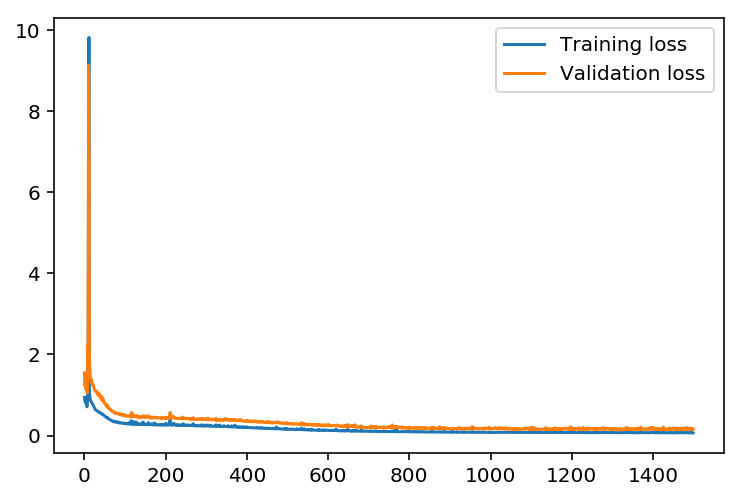

In [40]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

## Check out your predictions

Here, use the test data to view how well your network is modeling the data. If something is completely wrong here, make sure each step in your network is implemented correctly.

array([[-1.12285222e-01, -4.27033206e-01, -9.04843115e-01,
        -8.73653844e-01, -9.21100556e-01, -1.04672959e+00,
        -9.58664847e-01, -9.85907224e-01, -2.27517327e-01,
         1.23553225e+00,  2.19398644e+00,  7.70509588e-01,
        -1.17576578e-01, -3.53223608e-02,  1.05249323e-01,
         2.67400638e-01,  7.52826097e-02,  1.99954621e-01,
         8.26437430e-01,  2.47723754e+00,  2.33029279e+00,
         1.44095081e+00,  8.47069875e-01,  3.11801081e-01,
        -6.66794371e-02, -3.60363118e-01, -7.37289057e-01,
        -8.30794856e-01, -8.83255587e-01, -9.09125532e-01,
        -9.28517444e-01, -7.73229072e-01, -1.90405429e-01,
         1.18235894e+00,  2.14580133e+00,  7.31337746e-01,
        -2.00470327e-01, -3.83478283e-02,  2.59090299e-01,
         2.94190684e-01,  8.74278155e-02,  1.88850474e-01,
         8.19907752e-01,  2.35228579e+00,  2.24342769e+00,
         1.28621430e+00,  8.32021546e-01,  2.21171808e-01,
        -7.51195869e-02, -3.87709117e-01, -7.28694451e-0

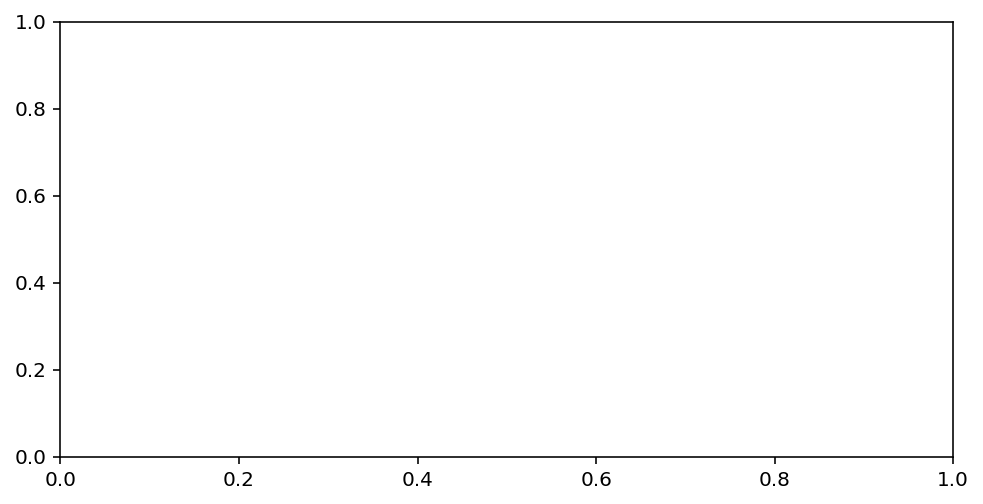

In [43]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
predictions = network.run(test_features).T*std + mean
predictions
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

## OPTIONAL: Thinking about your results(this question will not be evaluated in the rubric).
 
Answer these questions about your results. How well does the model predict the data? Where does it fail? Why does it fail where it does?

> **Note:** You can edit the text in this cell by double clicking on it. When you want to render the text, press control + enter

#### Your answer below

## Submitting:
Open up the 'jwt' file in the first-neural-network directory (which also contains this notebook) for submission instructions